### <font color='blue'>Problem Statement :</font>
  
    A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. 
    The company wants to know:
      - Which variables are significant in predicting the price of a house, and
      - How well those variables describe the price of a house.
      
### <font color='blue'>Business Goal:</font>
    
    To model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. Based on this data they can manipulate the strategy of the firm and concentrate on areas that will yield high returns. The model should help the management to understand the pricing dynamics of a new market.
    
    
### <font color='blue'>Analytical Goals:</font>
   
    - A regression model using regularization in order to predict the actual value of the 
     prospective properties and decide whether to invest in them or not.
    - Determine the optimal value of lambda for ridge and lasso regression. 
    - Determine which variables are significant in predicting the price of a house and 
    - Establish how well those variables describe the price of a house.


###  <u>Step1:  Load the data and understand the variables</u>

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import math

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", None, "display.max_columns", None)

##### Load the Dataset

In [2]:
houseprice = pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
houseprice.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##### Understanding the data 

In [3]:
houseprice.shape

(1460, 81)

##### Get the basic statistical information

In [4]:
houseprice.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Observation:
   - There are missing values that need to be assessed / treated
   - The target variable (dependent variable) = SalePrice count is in the range of 34900 to 755000 <br>
     On an average the house price is 180921.
   - There is a significant difference between mean and 50% for SalePrice which indicates presence of outliers.
     This we can further explore with other visualization.
   - This is only to understand the basic statistical data and as you know as per Anscombe’s quartet,
     we need to visualize the data before we can infer and not just rely on statistical data.

##### Check the datatype of the variables

In [5]:
houseprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### Observation:
  - There are 18 columns with null / missing values
  - There are many columns of type Object, so they need further processing

In [6]:
# Checking the percentage of Null values in all the columns
print('Percentage of Missing Values in each column is as follows:')
print(round(houseprice.isnull().sum()/len(houseprice.index)*100,2).sort_values(ascending=False)
      [round(houseprice.isnull().sum()/len(houseprice.index),2) > 0])


Percentage of Missing Values in each column is as follows:
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64


##### Observation:
  - There are 4 columns with missing values > 55% 
  - The other columns can be dropped during feature engineering based on the correlation.

In [7]:
# Dropping Columns with high missing values ,above 55%
houseprice.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

##### Check for unique values in each of the columns with missing values. This will help in imputing the missing values.

In [8]:
for col in houseprice.columns[houseprice.isnull().any()]:
    print(col,' : ',houseprice[col].unique())

LotFrontage  :  [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
MasVnrType  :  ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
MasVnrArea  :  [1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200

##### Treating missing values by imputing for columns with missing values less than or equal to 55%

In [9]:
# FireplaceQu 47.26% missing values => We can replace nan with NA -> No fire place
houseprice['FireplaceQu'] = houseprice['FireplaceQu'].replace(np.nan, 'NA')

In [10]:
houseprice[['LotFrontage','MasVnrArea','GarageYrBlt']].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [11]:
#Can see a presence of outlier for LotFrontage (17.74% missing values) so imputing the missing values through median
houseprice['LotFrontage']= houseprice.LotFrontage.fillna(houseprice.LotFrontage.median()) 
#Can see a presence of outlier for MasVnrArea (0.55% missing values) so imputing the missing values through median
houseprice['MasVnrArea']= houseprice.MasVnrArea.fillna(houseprice.MasVnrArea.median())
#GarageYrBlt (5.55% missing values) looks ok without any outlier, so we can impute the missing values through mean
houseprice['GarageYrBlt']= houseprice.GarageYrBlt.fillna(houseprice.GarageYrBlt.mean()) 

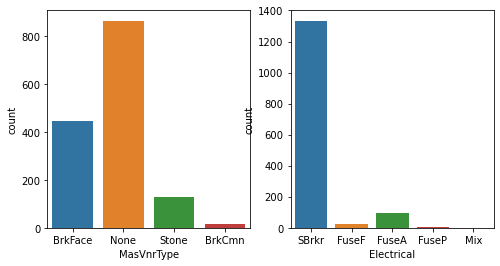

In [12]:
#Visualising the variables wih missing values
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
sns.countplot(x = 'MasVnrType', data = houseprice)
plt.subplot(1,2,2)
sns.countplot(x = 'Electrical', data = houseprice)
plt.show()

In [13]:
#replacing nan with the top option for MasVnrType and Electrical
houseprice['MasVnrType'] = houseprice['MasVnrType'].replace(np.nan, 'None')
houseprice['Electrical'] = houseprice['Electrical'].replace(np.nan, 'SBrkr')

In [14]:
# Fields related to Garage - After checking the data dictionary, we can impute by replace nan with 'No Garage'=NA
houseprice['GarageType'] = houseprice['GarageType'].replace(np.nan, 'NA')
houseprice['GarageFinish'] = houseprice['GarageFinish'].replace(np.nan,'NA')
houseprice['GarageCond'] = houseprice['GarageCond'].replace(np.nan, 'NA')
houseprice['GarageQual'] = houseprice['GarageQual'].replace(np.nan, 'NA')

In [15]:
# Fields related to Basement - After checking the data dictionary, we can impute by replace nan with 'No Basement'= NA
houseprice['BsmtExposure'] = houseprice['BsmtExposure'].replace(np.nan, 'NA')
houseprice['BsmtFinType2'] = houseprice['BsmtFinType2'].replace(np.nan, 'NA')
houseprice['BsmtFinType1'] = houseprice['BsmtFinType1'].replace(np.nan, 'NA')
houseprice['BsmtCond'] = houseprice['BsmtCond'].replace(np.nan, 'NA')
houseprice['BsmtQual'] = houseprice['BsmtQual'].replace(np.nan, 'NA')

#### Checking the missing values in all the columns after treating the missing values

In [16]:
print('Percentage of Missing Values in each column is as follows:')
print(round(houseprice.isnull().sum()/len(houseprice.index)*100,2).sort_values(ascending=False))

Percentage of Missing Values in each column is as follows:
Id               0.0
HalfBath         0.0
FireplaceQu      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
FullBath         0.0
HeatingQC        0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
Electrical       0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
GarageQual       0.0
GarageArea       0.0
CentralAir       0.0
Heating          0.0
MSSubClass       0.0
LandSlope        0.0
OverallCond      0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         

## <font color='green'>All the missing values are now successfully treated</font>

 ##### Checking for duplicates

In [17]:
houseprice_dup = houseprice.copy()

# Checking for duplicates and dropping the entire duplicate row if any
houseprice_dup.drop_duplicates(subset=None, inplace=True)

print("original data shape = ",houseprice.shape)
print("Data shape after removing dupicates = ", houseprice_dup.shape)

original data shape =  (1460, 77)
Data shape after removing dupicates =  (1460, 77)


#### Observation:
   - There are no duplicate rows in the dataset

### Data Profiling (EDA)

Let us review the target (dependent variable) - SalePrice

In [18]:
houseprice['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.882876


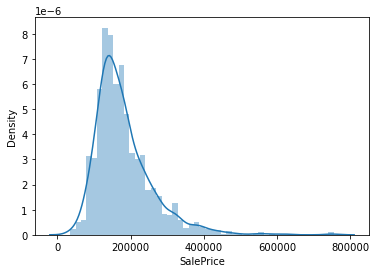

In [19]:
sns.distplot(houseprice['SalePrice']) 
print("Skewness: %f" % houseprice['SalePrice'].skew())

#### The target variable is skewed and hence need to transform to form normal distribution. We can do this during scaling of data.

In [20]:
# dropping the id column as it's not of much use in predicting house price
houseprice.drop('Id',axis=1,inplace = True)

In [21]:
#Converting Year columns into the actual age with reference to the max value of year 2010 
year_columns = ['YrSold','GarageYrBlt','YearRemodAdd','YearBuilt']
houseprice['YearBuilt_age'] = houseprice.YearBuilt.max()- houseprice.YearBuilt
houseprice['YearRemodAdd_age'] = houseprice.YearRemodAdd.max()- houseprice.YearRemodAdd
houseprice['GarageYrBlt_age'] = houseprice.GarageYrBlt.max()- houseprice.GarageYrBlt
houseprice['YrSold_age'] = houseprice.YrSold.max()- houseprice.YrSold
houseprice.drop(year_columns,axis=1,inplace = True)
houseprice.select_dtypes(include=['number']).describe()



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age,YrSold_age
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890,38.732192,25.134247,31.493836,2.184247
std,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883,30.202904,20.645407,23.994583,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000,10.000000,6.000000,9.000000,1.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000,37.000000,16.000000,31.493836,2.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000,56.000000,43.000000,48.000000,3.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000,138.000000,60.000000,110.000000,4.000000


#### Let us analyze all categorical variables

In [22]:
Cat = houseprice.select_dtypes(include=['object'])
Cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [23]:
def categoricalBoxPlots(xVars,y,data):
    len_xVars = len(xVars)
    cols = 2
    rows = math.ceil(len_xVars/cols)*2
    if rows <=2:
        hspace = 0.5
        plt.figure(figsize=(15,10))
    else:
        hspace = 0.75
        plt.figure(figsize=(15,30))
    index = 1
    for x in xVars:
        plt.subplot(rows,cols,index)
        plt.subplots_adjust(hspace=hspace, wspace=0.125)
        my_order = data.groupby(by=[x])[y].median().sort_values().iloc[::-1].index
        ax=sns.boxplot(x=x,y=y,data=data,order=my_order)
        index = index + 1
        ax1 = plt.subplot(rows,cols,index,title="SalePrice based on "+ x)
        plt.subplots_adjust(hspace=hspace, wspace=0.125)
        temp_df = (data.groupby(x).sum().sort_values(y,ascending=False)[y] / data.groupby(x).sum().sort_values(y,ascending=False)[y].sum())*100
        temp_df=temp_df.round(decimals=2)
        ax2 = temp_df.plot(kind='bar',ax=ax1)
        ax2.bar_label(ax2.containers[0],fmt='%.2f%%')
        #data.groupby(x).sum().sort_values(y,ascending=False)[y].plot.bar(ax=ax1)
        plt.setp(ax.get_xticklabels(), rotation=90)
        index = index + 1
    plt.show()

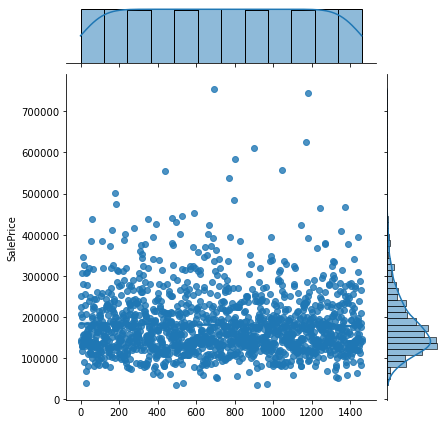

In [24]:
sns.jointplot(data=houseprice,x=houseprice.index, y=houseprice['SalePrice'],kind='reg')
plt.show()

#### Visualising the numerical data
#### <font color='red'>As there are many columns, let us review them in sub groups </font>

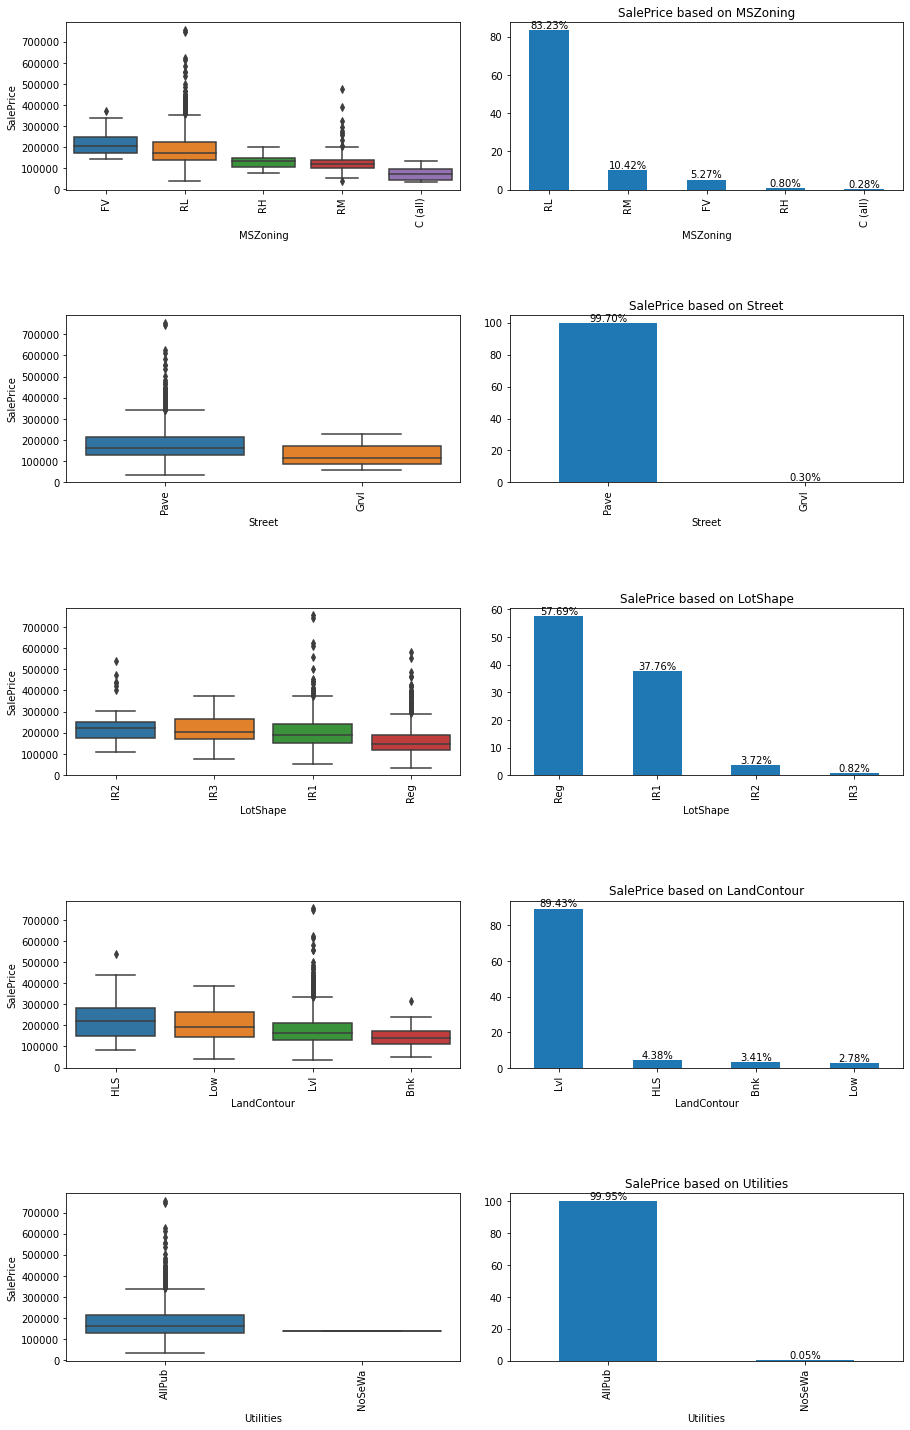

In [25]:
# visualising the categorical variables season and weather against count
xVars=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities']
categoricalBoxPlots(xVars,y='SalePrice',data=houseprice)

In [26]:
# Dropping the highly skewed columns as there is predominantly only one type of value.
houseprice.drop(['Utilities','Street'],axis=1,inplace = True)

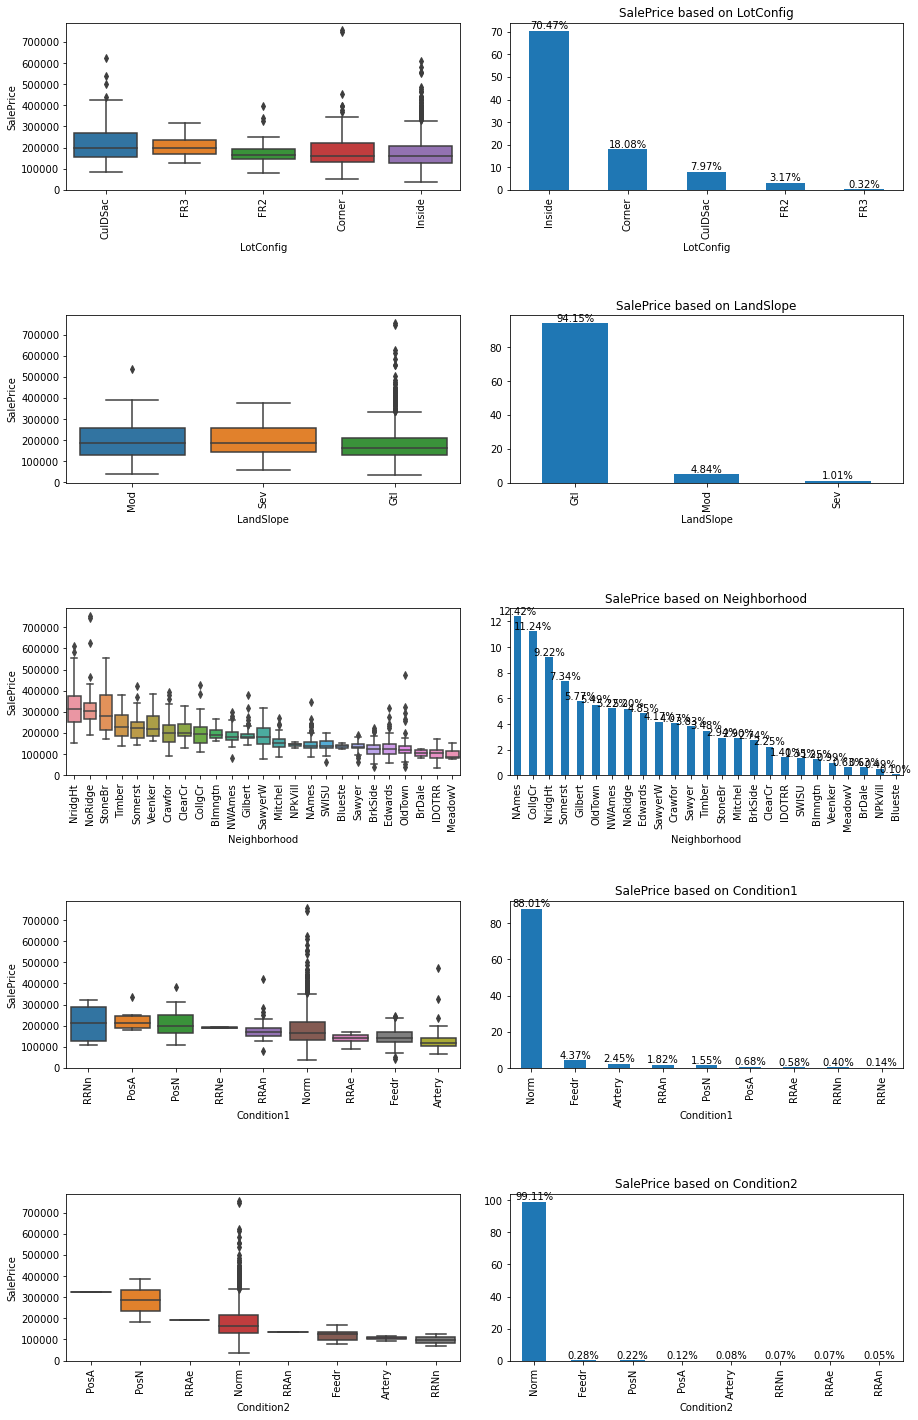

In [27]:
xVars=['LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2']
categoricalBoxPlots(xVars,y='SalePrice',data=houseprice)

In [28]:
# Dropping the highly skewed columns as there is predominantly only one type of value.
houseprice.drop(['Condition1','Condition2'],axis=1,inplace = True)

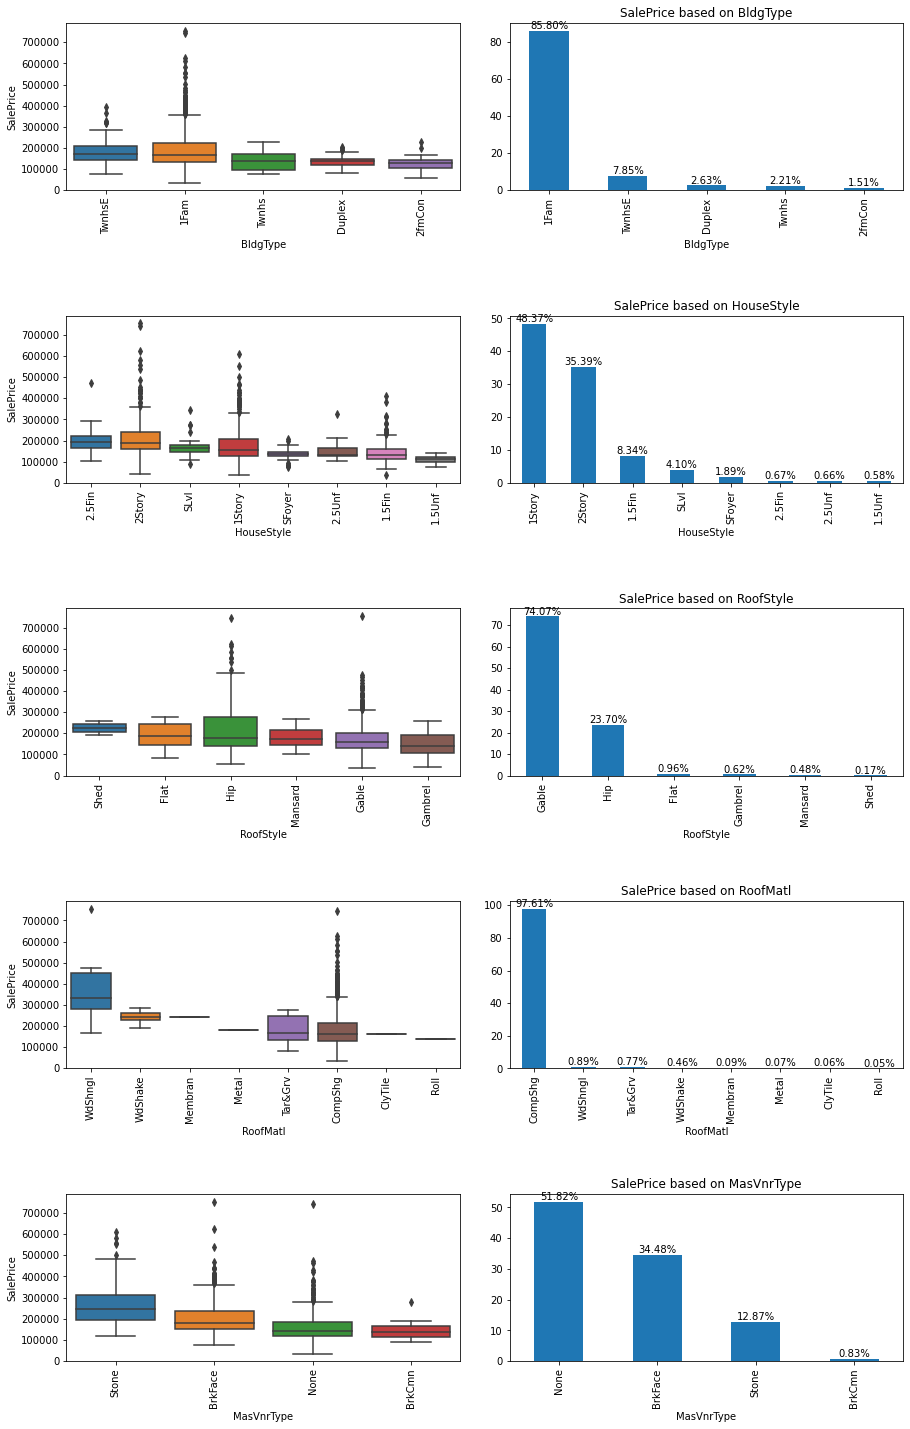

In [29]:
xVars=['BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType']
categoricalBoxPlots(xVars,y='SalePrice',data=houseprice)

In [30]:
# Dropping the highly skewed columns as there is predominantly only one type of value.
houseprice.drop(['RoofMatl'],axis=1,inplace = True)

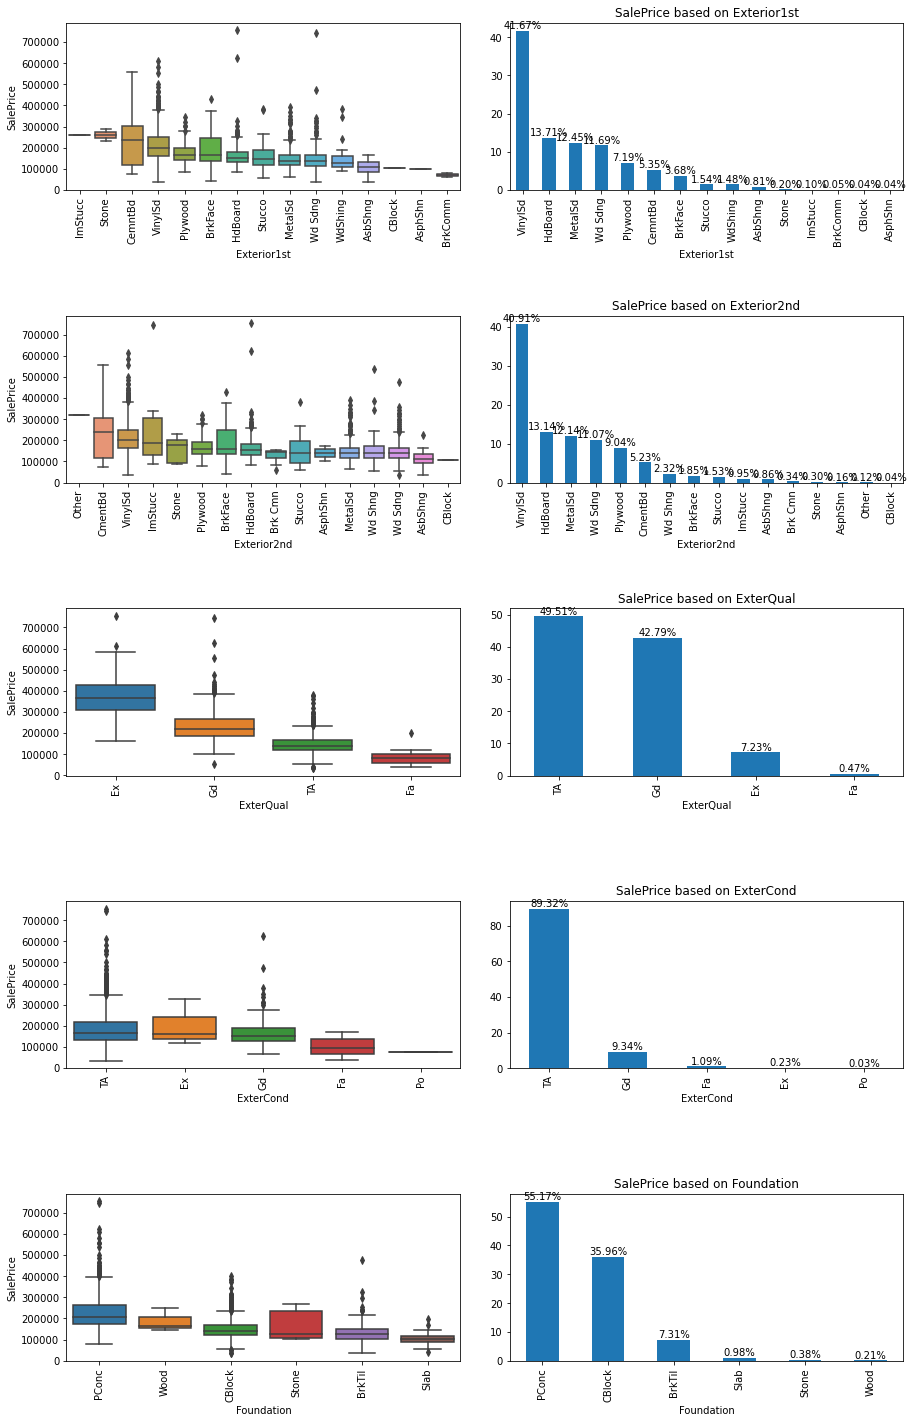

In [31]:
xVars=['Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation']
categoricalBoxPlots(xVars,y='SalePrice',data=houseprice)

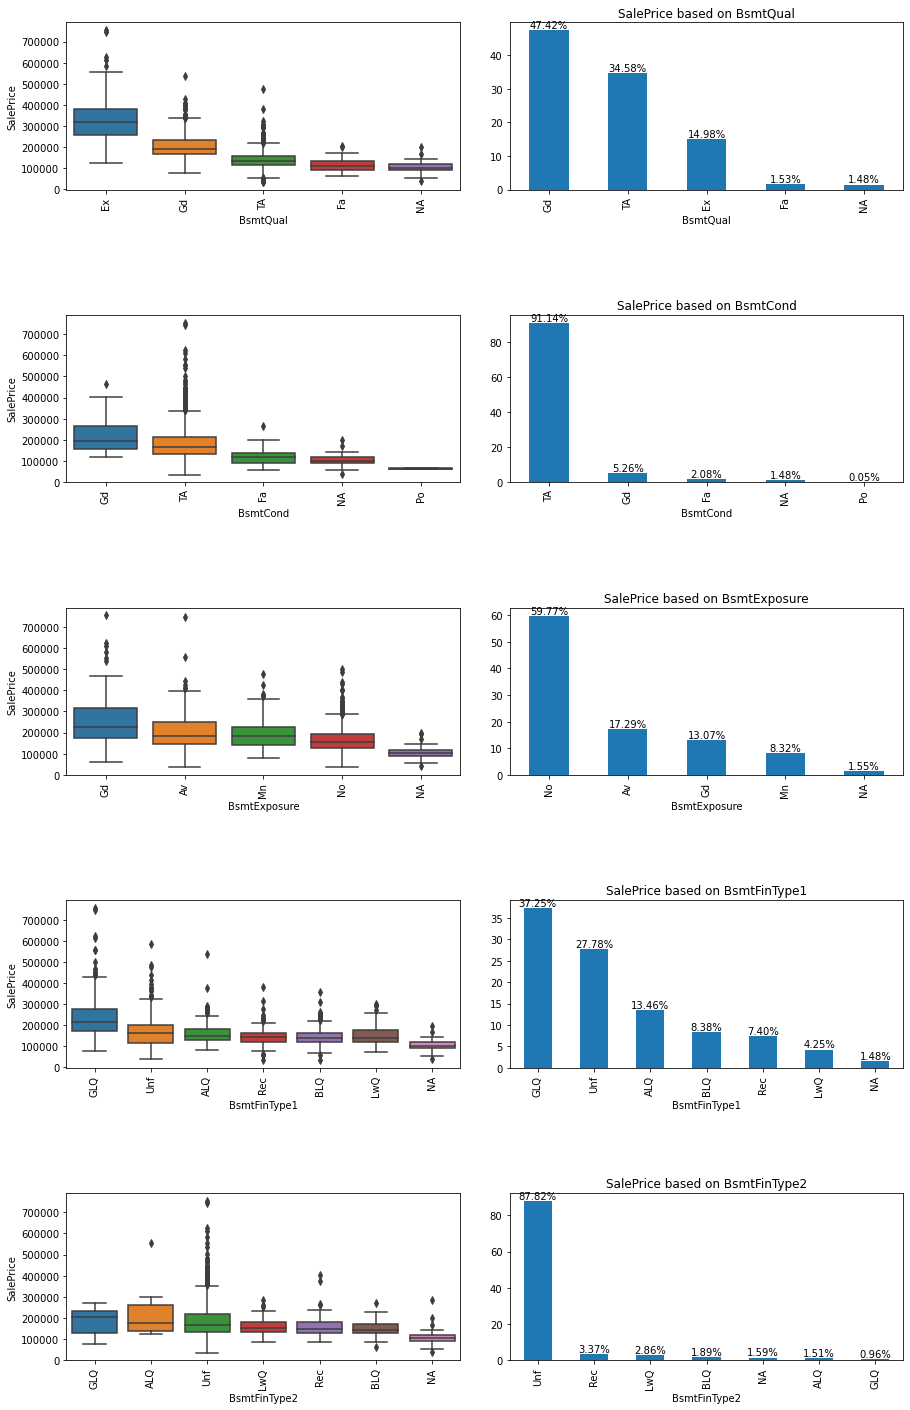

In [32]:
xVars=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
categoricalBoxPlots(xVars,y='SalePrice',data=houseprice) 

In [33]:
# Dropping the highly skewed columns as there is predominantly only one type of value.
houseprice.drop(['BsmtCond', 'BsmtFinType2'],axis=1,inplace = True)

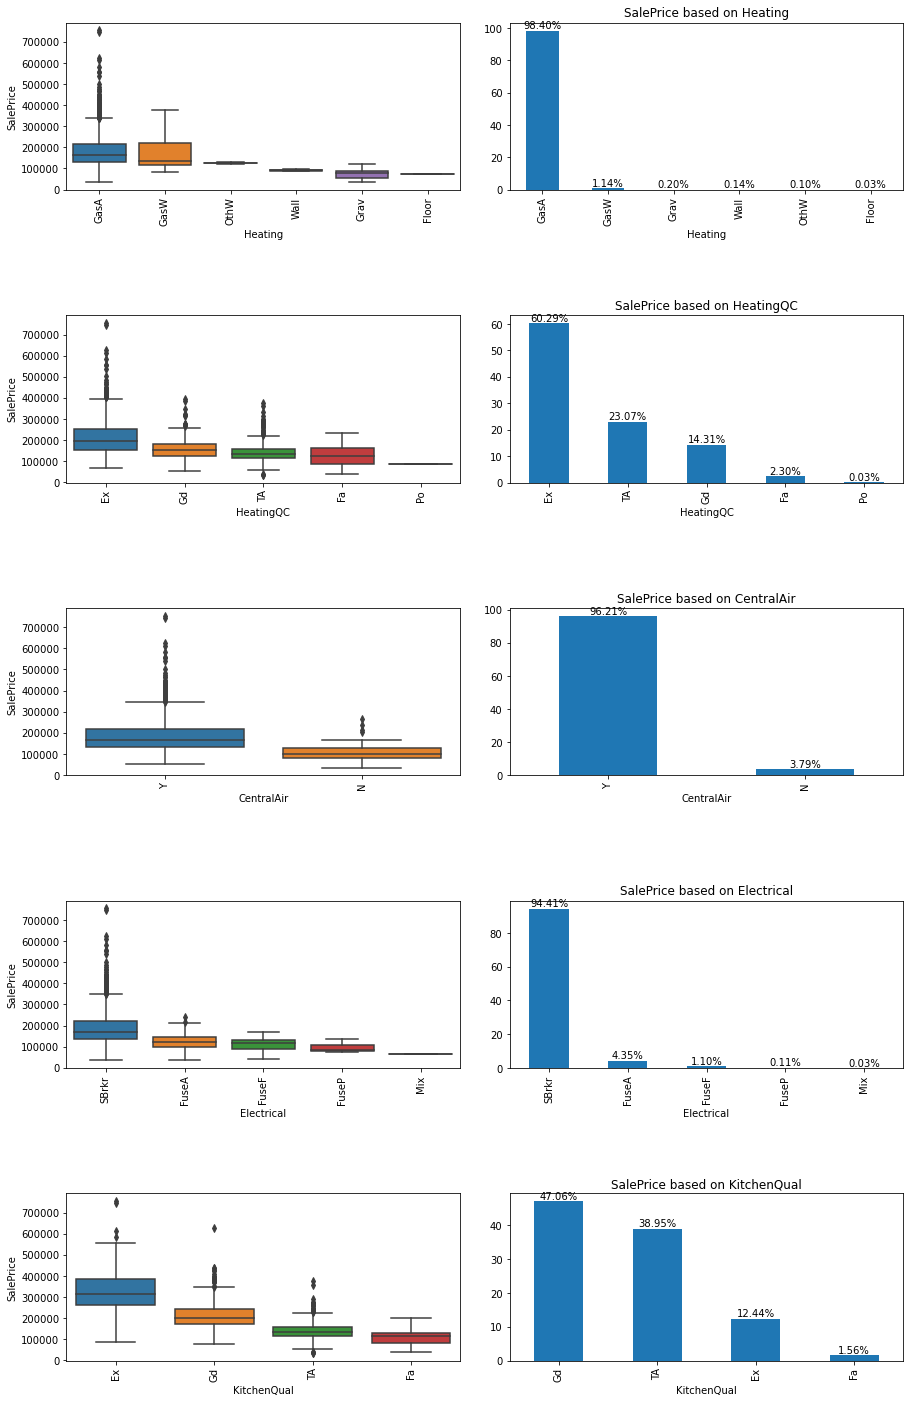

In [34]:
xVars=['Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual']
categoricalBoxPlots(xVars,y='SalePrice',data=houseprice) 

In [35]:
# Dropping the highly skewed columns as there is predominantly only one type of value.
houseprice.drop(['Heating', 'CentralAir', 'Electrical'],axis=1,inplace = True)

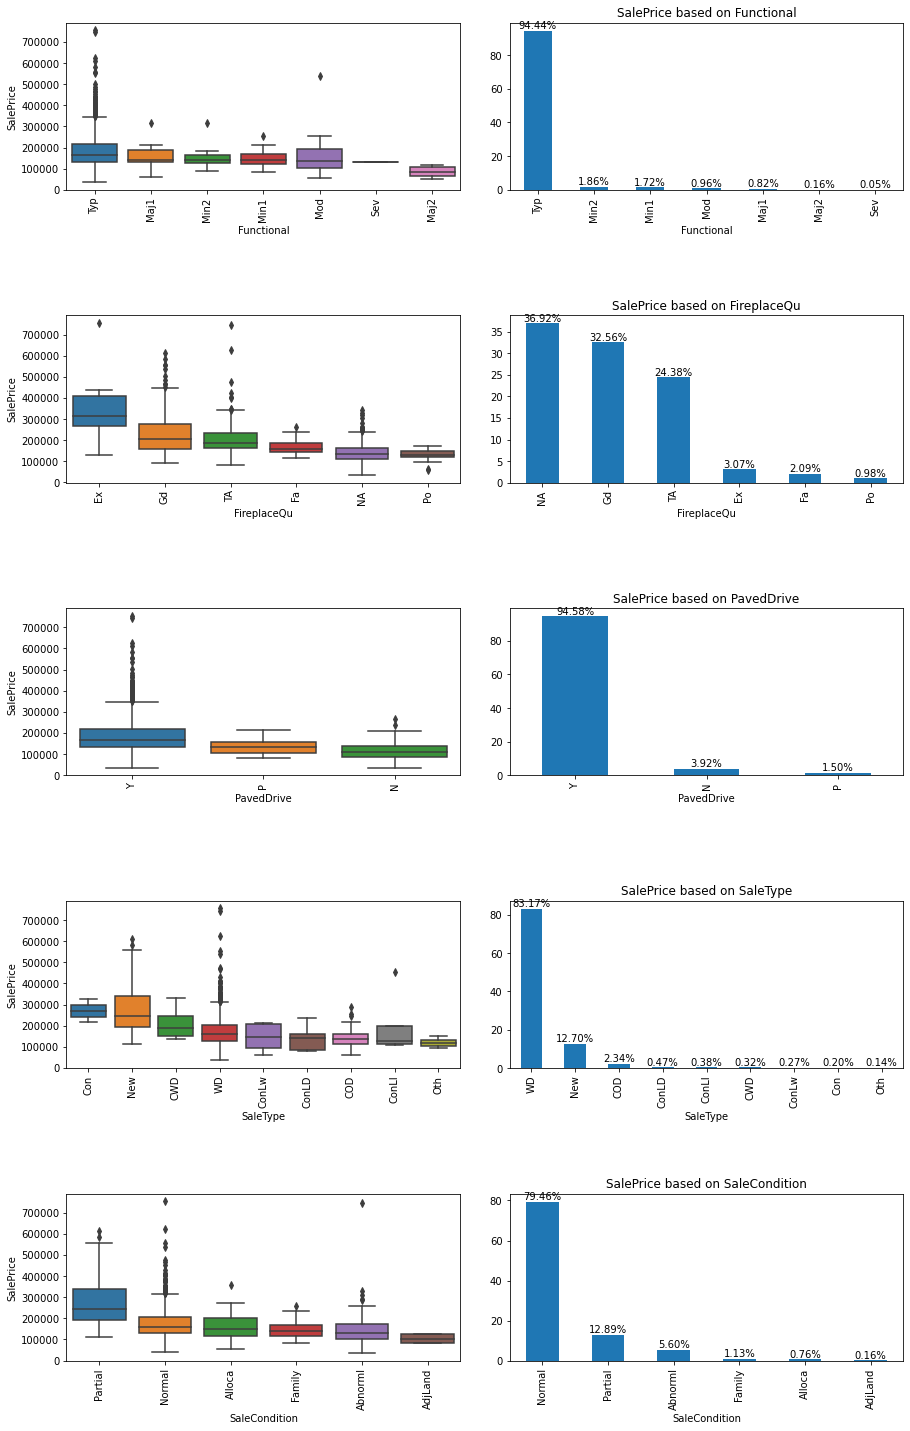

In [36]:
xVars =['Functional', 'FireplaceQu','PavedDrive', 'SaleType', 'SaleCondition']
categoricalBoxPlots(xVars,y='SalePrice',data=houseprice)

In [37]:
# Dropping the highly skewed columns as there is predominantly only one type of value.
houseprice.drop(['Functional', 'PavedDrive'],axis=1,inplace = True)

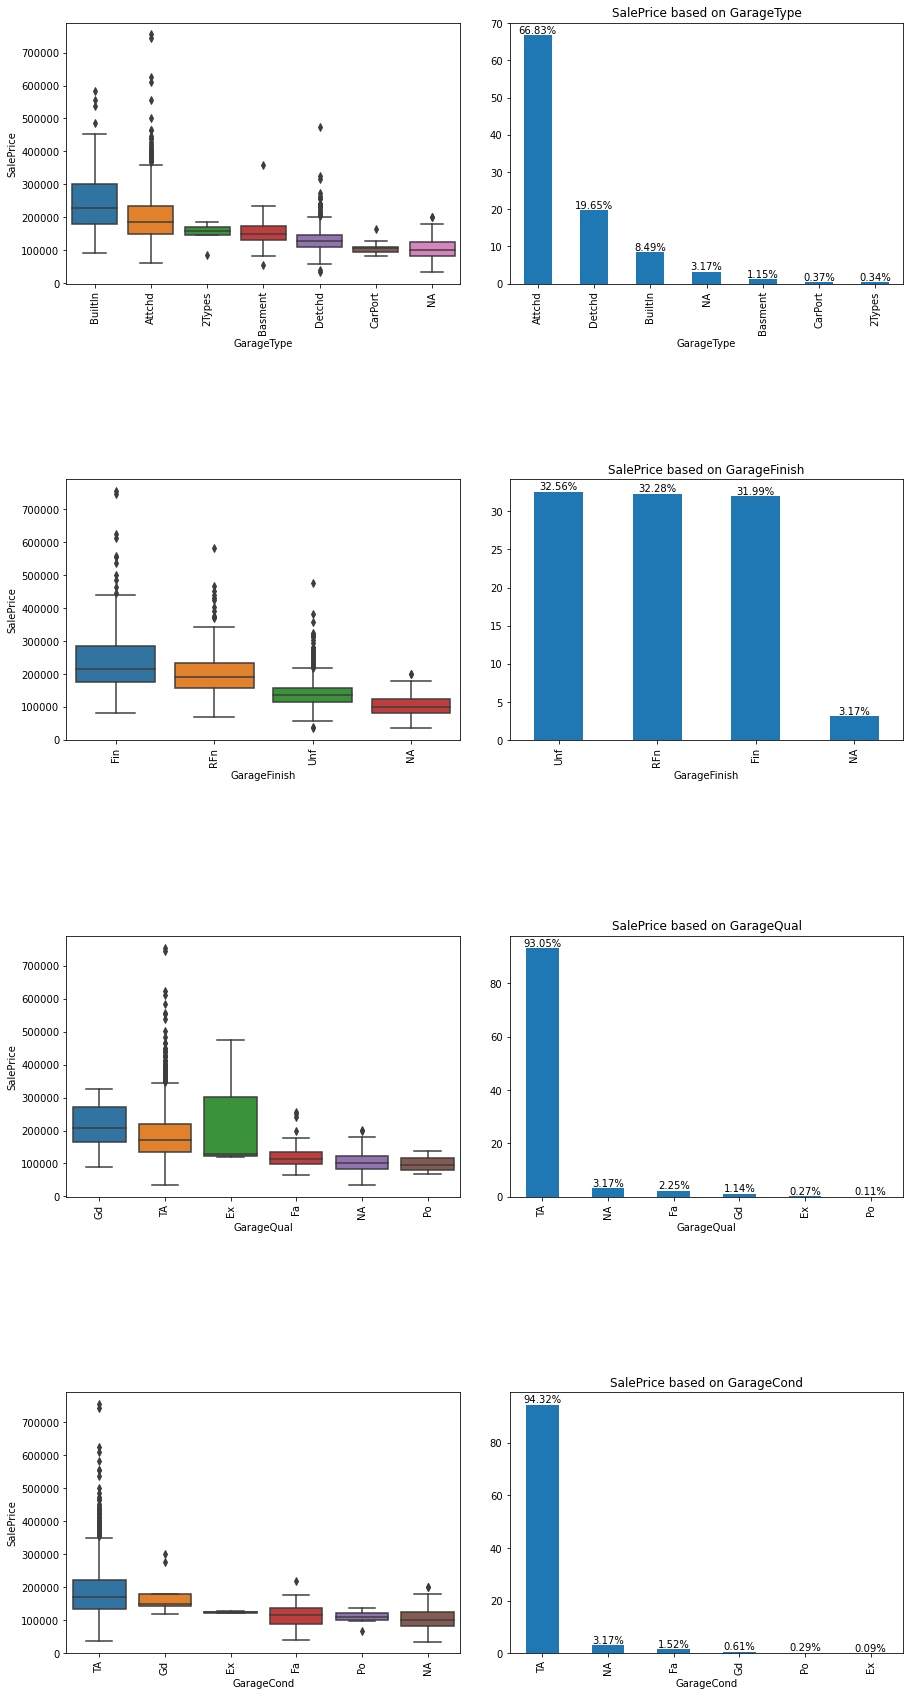

In [38]:
xVars = ['GarageType', 'GarageFinish', 'GarageQual','GarageCond']
categoricalBoxPlots(xVars,y='SalePrice',data=houseprice)

In [39]:
# Dropping the highly skewed columns as there is predominantly only one type of value.
houseprice.drop(['GarageQual','GarageCond'],axis=1,inplace = True)

In [40]:
houseprice.shape

(1460, 62)

#### Reviewing the numerical variables

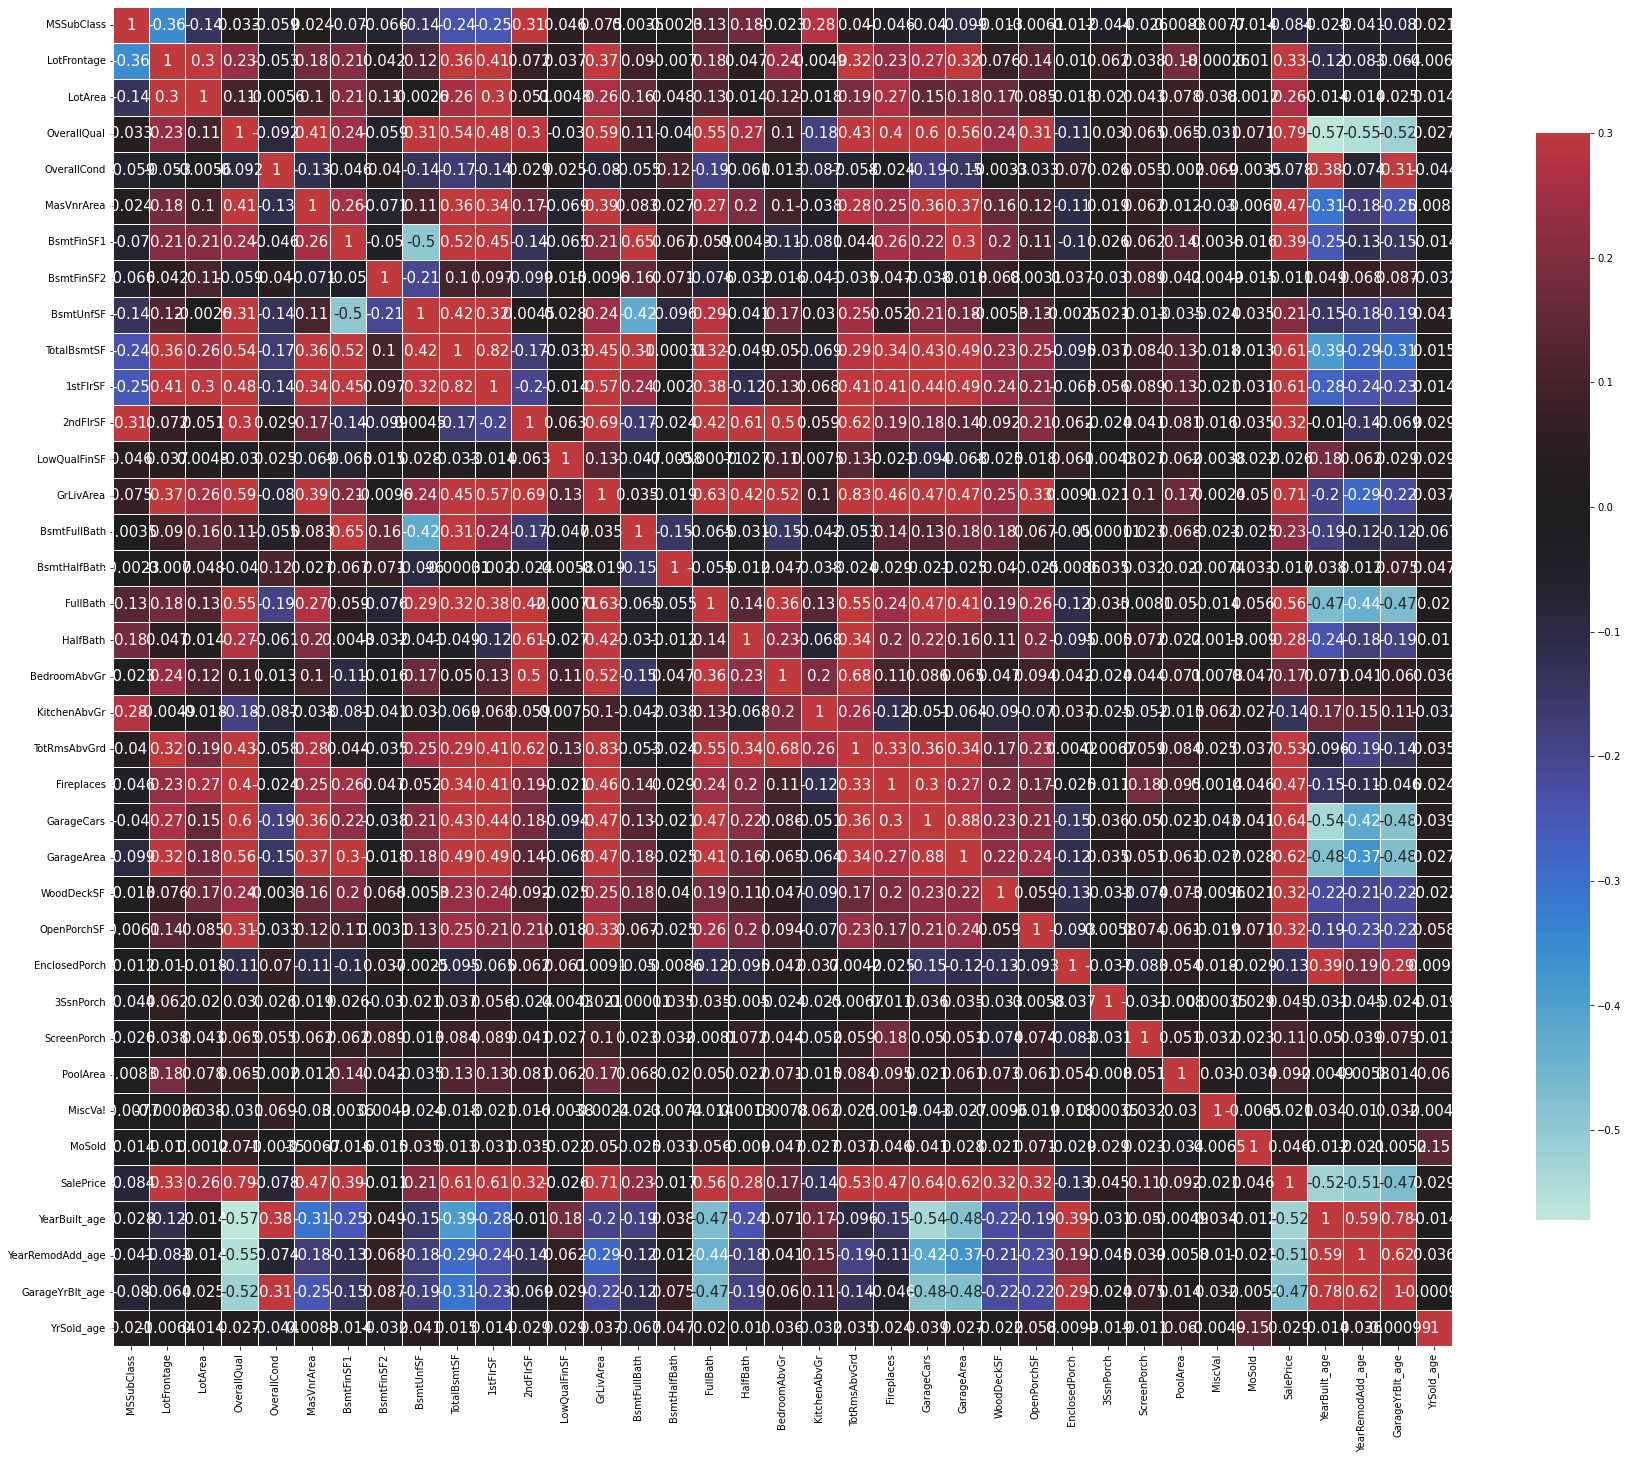

In [41]:
plt.figure(figsize = (30,40))
mask = np.zeros_like(houseprice.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(houseprice.corr(), vmax=.3, center=0,annot=True,annot_kws={'size':15},
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

#### Observation:
   - The correlation matrix shows that there is a high collinearlity between variables
   - Hence further feature elimintation is required.

#### Let us get the top 10 variables that have good correlation with target variable - SalePrice

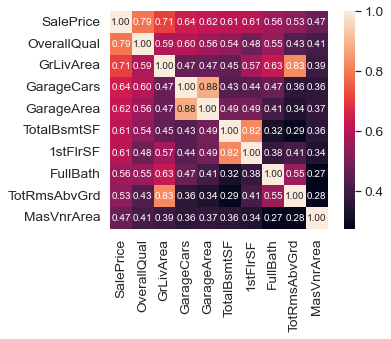

In [42]:
#saleprice correlation matrix
corrmat = houseprice.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(houseprice[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Let us visualize the numerical variables having good correlation

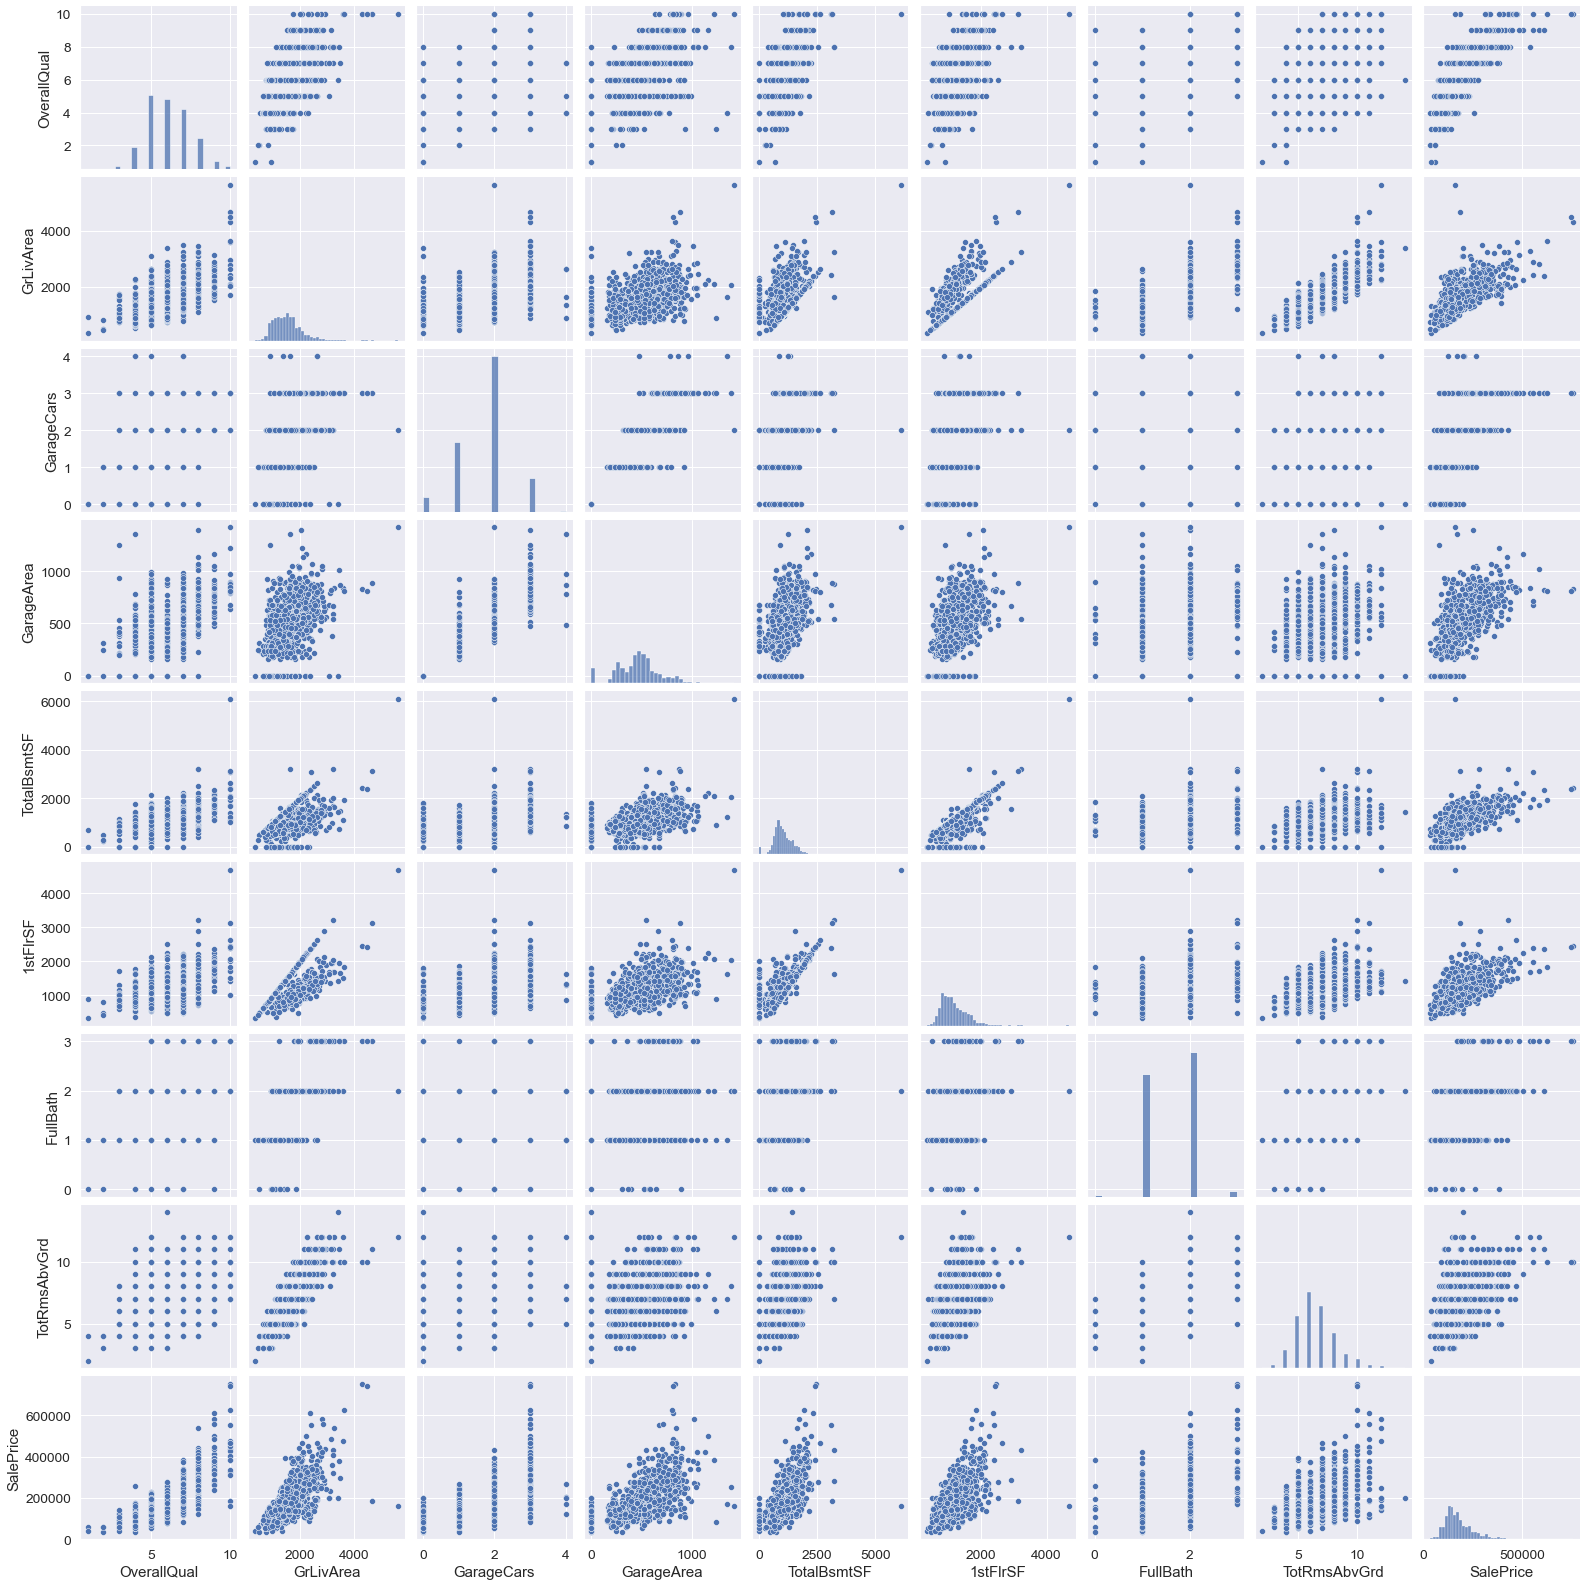

In [43]:
sns.pairplot(houseprice[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF',
                   'FullBath','TotRmsAbvGrd','SalePrice']])
plt.show()

#### Observation:
   - These variables are highly correlated with SalePrice
   - SalePrice is linearly increasing with these variables

## Step 3: Data Preparation 

- You can see that the dataset has many columns with categorical values.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s.

- Encoding:
  converting binary categorical variables to 1 and 0
  Other categorical variables to dummy variables
  
- split into train and test
- rescaling of the variables

In [44]:
# Removing outliers > +3 Std. Deviation or < -3 Std. Deviation 
# Checking if outliers exist
from scipy import stats
num_col = houseprice.select_dtypes(include=['number']).columns
z = np.abs(stats.zscore(houseprice[num_col]))
# Outlier Removed Records
selected = houseprice[num_col][(z < 3).all(axis=1)]
houseprice = houseprice.loc[selected.index]

In [45]:
houseprice.select_dtypes(include=['number']).describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age,YrSold_age
count,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.0,1015.000000,1015.000000,1015.000000,1015.0,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.00000,1015.000000,1015.0,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000
mean,53.931034,67.303448,9139.664039,6.072906,5.521182,82.213793,413.388177,18.672906,581.819704,1013.880788,1099.647291,322.860099,0.288670,1422.796059,0.405911,0.0,1.550739,0.374384,2.786207,1.0,6.244335,0.545813,1.749754,464.533990,87.697537,42.044335,14.881773,0.02266,5.989163,0.0,14.782266,6.252217,172714.054187,34.888670,23.960591,29.360312,2.186207
std,40.369535,18.267801,3634.390581,1.314689,0.984743,130.064354,403.773301,75.643182,423.597558,362.235981,329.700431,407.205142,4.649916,429.403578,0.491310,0.0,0.519005,0.484202,0.698411,0.0,1.392926,0.592208,0.709500,197.227356,107.115075,53.355521,43.116257,0.72193,28.824383,0.0,101.436540,2.681560,63514.906369,29.052194,20.737640,24.020892,1.343333
min,20.000000,21.000000,1300.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.0,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,1.000000,35311.000000,1.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7200.000000,5.000000,5.000000,0.000000,0.000000,0.000000,253.000000,790.000000,858.000000,0.000000,0.000000,1092.000000,0.000000,0.0,1.000000,0.000000,2.000000,1.0,5.000000,0.000000,1.000000,323.500000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,4.000000,128000.000000,7.000000,6.000000,7.000000,1.000000
50%,50.000000,69.000000,9066.000000,6.000000,5.000000,0.000000,386.000000,0.000000,501.000000,958.000000,1041.000000,0.000000,0.000000,1392.000000,0.000000,0.0,2.000000,0.000000,3.000000,1.0,6.000000,0.000000,2.000000,472.000000,0.000000,27.000000,0.000000,0.00000,0.000000,0.0,0.000000,6.000000,160000.000000,33.000000,14.000000,27.000000,2.000000
75%,60.000000,76.000000,10996.000000,7.000000,6.000000,143.500000,695.000000,0.000000,827.000000,1234.500000,1308.000000,702.500000,0.000000,1689.500000,1.000000,0.0,2.000000,1.000000,3.000000,1.0,7.000000,1.000000,2.000000,576.000000,167.000000,63.000000,0.000000,0.00000,0.000000,0.0,0.000000,8.000000,206950.000000,54.000000,42.000000,46.000000,3.000000
max,180.000000,134.000000,29959.000000,10.000000,8.000000,640.000000,1646.000000,506.000000,1869.000000,2158.000000,2207.000000,1427.000000,80.000000,2978.000000,1.000000,0.0,3.000000,1.000000,5.000000,1.0,11.000000,2.000000,4.000000,1053.000000,468.000000,244.000000,205.000000,23.00000,182.000000,0.0,1300.000000,12.000000,402861.000000,125.000000,60.000000,100.000000,4.000000


In [46]:
#Based on data description the following columns are ordinal
ordinal_columns = ['LandSlope','ExterQual','BsmtQual','BsmtExposure','BsmtFinType1',
            'HeatingQC', 'KitchenQual','GarageFinish','ExterCond','LotShape']
houseprice[ordinal_columns].head()

,LandSlope,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageFinish,ExterCond,LotShape
0,Gtl,Gd,Gd,No,GLQ,Ex,Gd,RFn,TA,Reg
2,Gtl,Gd,Gd,Mn,GLQ,Ex,Gd,RFn,TA,IR1
4,Gtl,Gd,Gd,Av,GLQ,Ex,Gd,RFn,TA,IR1
6,Gtl,Gd,Ex,Av,GLQ,Ex,Gd,RFn,TA,Reg
10,Gtl,TA,TA,No,Rec,Ex,TA,Unf,TA,Reg


In [47]:
houseprice['LandSlope'] = houseprice['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
houseprice['ExterQual'] = houseprice['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
houseprice['BsmtQual'] = houseprice['BsmtQual'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
houseprice['BsmtExposure'] = houseprice['BsmtExposure'].map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
houseprice['BsmtFinType1'] = houseprice['BsmtFinType1'].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
houseprice['HeatingQC'] = houseprice['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
houseprice['KitchenQual'] = houseprice['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
houseprice['GarageFinish'] = houseprice['GarageFinish'].map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
houseprice['ExterCond'] = houseprice['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
houseprice['LotShape'] = houseprice['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
houseprice[ordinal_columns].head()

,LandSlope,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageFinish,ExterCond,LotShape
0,0,3,4,1,6,4,3,2,2,3
2,0,3,4,2,6,4,3,2,2,0
4,0,3,4,3,6,4,3,2,2,0
6,0,3,5,3,6,4,3,2,2,3
10,0,2,3,1,3,4,2,1,2,3


#### Dummy Variables

In [48]:
# Creating the dummy variables for these columns using the description provided in the data dictionary
dummy_columns = ['MSZoning','LandContour','LotConfig','Neighborhood','BldgType',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'GarageType','SaleType','SaleCondition','FireplaceQu']
houseprice = pd.get_dummies(data=houseprice,columns=dummy_columns,drop_first=True)
houseprice.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age,YrSold_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA
0,60,65.0,8450,3,0,7,5,196.0,3,2,4,1,6,706,0,150,856,4,856,854,0,1710,1,0,2,1,3,1,3,8,0,2,2,548,0,61,0,0,0,0,0,2,208500,7,7,7.0,2,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,60,68.0,11250,0,0,7,5,162.0,3,2,4,2,6,486,0,434,920,4,920,866,0,1786,1,0,2,1,3,1,3,6,1,2,2,608,0,42,0,0,0,0,0,9,223500,9,8,9.0,2,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,60,84.0,14260,0,0,8,5,350.0,3,2,4,3,6,655,0,490,1145,4,1145,1053,0,2198,1,0,2,1,4,1,3,9,1,2,3,836,192,84,0,0,0,0,0,12,250000,10,10,10.0,2,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
6,20,75.0,10084,3,0,8,5,186.0,3,2,5,3,6,1369,0,317,1686,4,1694,0,0,1694,1,0,2,0,3,1,3,7,1,2,2,636,255,57,0,0,0,0,0,8,307000,6,5,6.0,3,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
10,20,70.0,11200,3,0,5,5,0.0,2,2,3,1,3,906,0,134,1040,4,1040,0,0,1040,1,0,1,0,3,1,2,5,0,1,1,384,0,0,0,0,0,0,0,2,129500,45,45,45.0,2,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [49]:
print(houseprice.shape)

(1015, 153)


## Step 4: Splitting the Data into Training and Testing Sets and scaling

As you know, the first basic step for regression is performing a train-test split.


#### Create train and test data

In [50]:
houseprice_train,houseprice_test = train_test_split(houseprice, train_size=0.7,test_size = 0.3, random_state=100)
print(houseprice_train.shape)
print(houseprice_test.shape)

(710, 153)
(305, 153)


### Rescaling the Features 

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling (normalization)
2. Standardisation (mean-0, sigma-1) 

This time, we will use standard scaling.

normalization = (x-xmin)/(xmax-xmin)
standardization= (x-m)/sigma

fit(): learns m and sigma
transform(): (x-m)/(sigma)

fit_transform():

In [51]:
# Instantiate an object
scaler = StandardScaler()
# create a list of numeric variables
num_vars = houseprice_train.select_dtypes(include=['number']).columns
# Fit on data
houseprice_train[num_vars]=scaler.fit_transform(houseprice_train[num_vars])
houseprice_test[num_vars] = scaler.transform(houseprice_test[num_vars])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

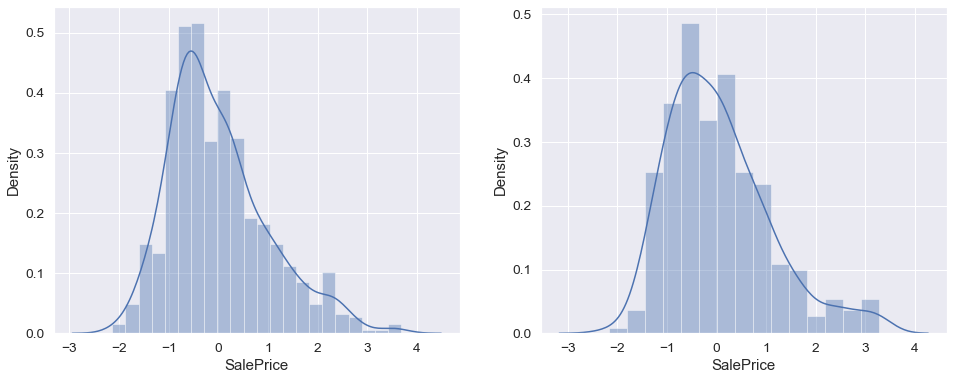

In [52]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(houseprice_train.SalePrice)
plt.subplot(1,2,2)
sns.distplot(houseprice_test.SalePrice)

### Dividing into X and y sets for the model building

In [53]:
y_train = houseprice_train.pop('SalePrice')
X_train = houseprice_train
y_test = houseprice_test.pop('SalePrice')
X_test = houseprice_test

In [54]:
def build_model(features):
    X_train_sm = sm.add_constant(X_train[features])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return X_train_sm,lm

In [55]:
def calculate_VIF(features):
    df1 = X_train[features]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [56]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [57]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('MSSubClass', True, 1),
 ('LotFrontage', False, 82),
 ('LotArea', False, 5),
 ('LotShape', False, 92),
 ('LandSlope', False, 73),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 51),
 ('ExterQual', True, 1),
 ('ExterCond', False, 79),
 ('BsmtQual', False, 62),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 11),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 31),
 ('BsmtUnfSF', False, 26),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 123),
 ('1stFlrSF', False, 2),
 ('2ndFlrSF', False, 10),
 ('LowQualFinSF', False, 30),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 54),
 ('BsmtHalfBath', False, 34),
 ('FullBath', False, 68),
 ('HalfBath', False, 115),
 ('BedroomAbvGr', False, 45),
 ('KitchenAbvGr', False, 36),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', False, 47),
 ('Fireplaces', False, 97),
 ('GarageFinish', False, 75),
 ('GarageCars', True, 1),
 ('GarageArea', False, 77),
 ('WoodDeckSF', False, 13),
 ('OpenPorchSF', False, 50),
 ('Enclos

In [58]:
features=X_train.columns[rfe.support_]
features

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'ExterQual', 'BsmtExposure',
       'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'KitchenQual', 'GarageCars',
       'YearBuilt_age', 'Neighborhood_Crawfor', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'SaleType_CWD',
       'SaleCondition_Partial'],
      dtype='object')

### Model 1 - Build with features supported by RFE

In [59]:
X_train_lm,lr_model = build_model(features)
calculate_VIF(features)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     345.3
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:19:01   Log-Likelihood:                -155.45
No. Observations:                 710   AIC:                             352.9
Df Residuals:                     689   BIC:                             448.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.769e-

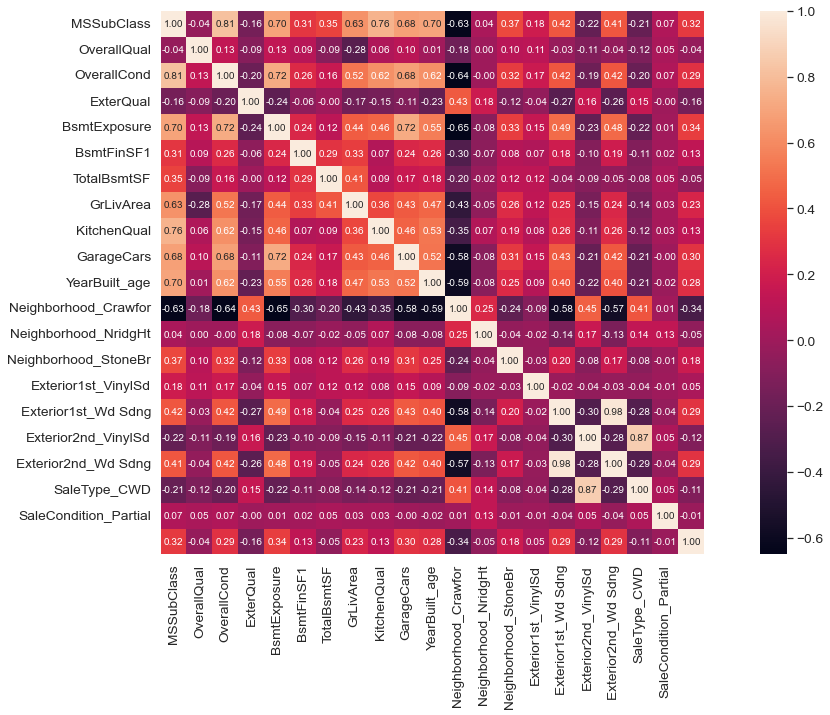

In [60]:
plt.figure(figsize = (20,10))
corrmat = houseprice.corr()
k = 10 #number of variables for heatmap
cols = features
l = cols.tolist()
l.insert(0,'SalePrice')
cm = np.corrcoef(houseprice[l].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Observartion:

     - p-values are all less than 0.05. 
     - The VIF for Exterior1st_VinylSd(21.67),Exterior2nd_VinylSd (21.32) are very high
     - The VIF for Exterior1st_Wd Sdng(4.70),Exterior2nd_Wd Sdng(4.48) are closed to 5
     - Exterior1st_VinylSd and Exterior2nd_VinylSd has a high correlation of 0.98,
       so one of them can be dropped. checking the correlation matrix 
       - Exterior1st_VinylSd has a correlation of 0.05 with SalePrice
       - Exterior2nd_VinylSd has a correlation of -0.12 with SalePrice
       - Both Exterior1st_Wd Sdng and Exterior2nd_Wd Sdng has a correlation of 0.29
     - Let us first drop Exterior1st_VinylSd

### Model 2

In [61]:
features = features.drop('Exterior1st_VinylSd')
X_train_lm,lr_model = build_model(features)
calculate_VIF(features)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     357.1
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:19:03   Log-Likelihood:                -161.62
No. Observations:                 710   AIC:                             363.2
Df Residuals:                     690   BIC:                             454.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.769e-

#### Observartion:

     - p-value of Exterior2nd_VinylSd is 0.577 which is greater than 0.05  . 
     - Let us drop this feature.

### Model 3

In [62]:
features = features.drop('Exterior2nd_VinylSd')
X_train_lm,lr_model = build_model(features)
calculate_VIF(features)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     377.3
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:19:03   Log-Likelihood:                -161.78
No. Observations:                 710   AIC:                             361.6
Df Residuals:                     691   BIC:                             448.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.769e-

#### Observartion:

     - p-value of all values are less than 0.05 and VIF for all features are less than 5. 
     - We can drop Exterior2nd_Wd Sdng as its quite close to 0.05

### Model 4

In [63]:
features = features.drop('Exterior2nd_Wd Sdng')
X_train_lm,lr_model = build_model(features)
calculate_VIF(features)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     397.5
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:19:03   Log-Likelihood:                -163.83
No. Observations:                 710   AIC:                             363.7
Df Residuals:                     692   BIC:                             445.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.769e-

#### Observartion:

     - p-value for Exterior1st_Wd Sdng is > 0.05 and hence can be dropped

### Model 5

In [64]:
features = features.drop('Exterior1st_Wd Sdng')
X_train_lm,lr_model = build_model(features)
calculate_VIF(features)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     421.2
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:19:03   Log-Likelihood:                -165.16
No. Observations:                 710   AIC:                             364.3
Df Residuals:                     693   BIC:                             441.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.769e-

#### Observartion:

     - p-value for all variables are less than 0.05
     - VIF for all features are less than 5
     - We can take this as final model from Linear regression

In [65]:
X_train_lm.columns

Index(['const', 'MSSubClass', 'OverallQual', 'OverallCond', 'ExterQual',
       'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'KitchenQual',
       'GarageCars', 'YearBuilt_age', 'Neighborhood_Crawfor',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'SaleType_CWD',
       'SaleCondition_Partial'],
      dtype='object')

### Final Model coefficients

In [66]:
lr_model.params

const                   -1.769418e-16
MSSubClass              -1.284967e-01
OverallQual              1.861789e-01
OverallCond              7.597410e-02
ExterQual                7.766654e-02
BsmtExposure             5.969992e-02
BsmtFinSF1               1.263228e-01
TotalBsmtSF              6.017812e-02
GrLivArea                4.104561e-01
KitchenQual              6.636416e-02
GarageCars               6.929760e-02
YearBuilt_age           -2.025366e-01
Neighborhood_Crawfor     9.691498e-02
Neighborhood_NridgHt     1.032590e-01
Neighborhood_StoneBr     5.777614e-02
SaleType_CWD             5.047716e-02
SaleCondition_Partial    7.385356e-02
dtype: float64

## Model Evaluation

### Residual Analysis of the train data

Text(0.5, 0, 'Errors')

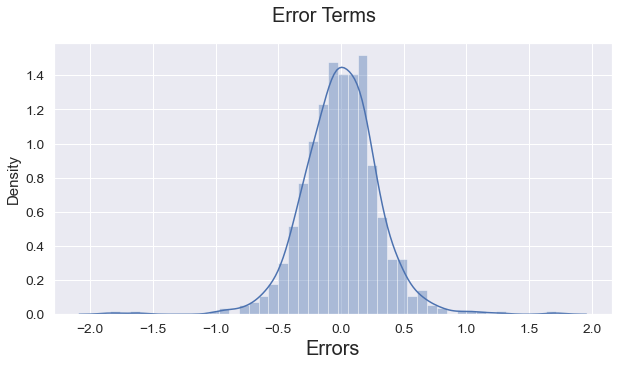

In [67]:
y_train_pred = lr_model.predict(X_train_lm)
res = y_train - y_train_pred
fig = plt.figure(figsize=(10,5))
sns.distplot(res)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors',fontsize=20)

#### Errors are normally distribured with mean 0  and are normally distributed

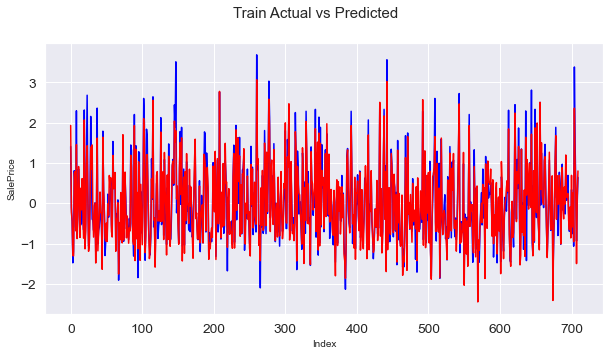

In [68]:
# Actual vs Predicted
fig = plt.figure(figsize=(10,5))
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Train Actual vs Predicted', fontsize = 15)
plt.xlabel('Index', fontsize=10)
plt.ylabel('SalePrice', fontsize=10)
plt.show()

 ####  Actual and predicted values are almost following the same pattern on trained set. So model looks good.


#### Linearity Check

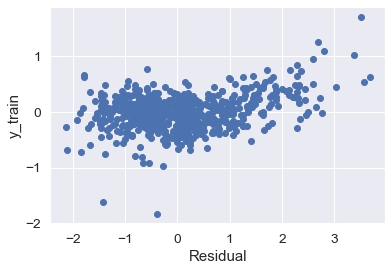

In [69]:
# Error Terms
plt.scatter(y_train,res)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

#### We can observe that the error is randomly distributed and independent of each other.

#### Predict values for test data set

In [70]:
# scaling for test data is already done while performing the scaling of train data

#### Predict on the test model

In [71]:
X_test_new = X_test[features]
X_test_new = sm.add_constant(X_test_new)
X_test_new.head()

,const,MSSubClass,OverallQual,OverallCond,ExterQual,BsmtExposure,BsmtFinSF1,TotalBsmtSF,GrLivArea,KitchenQual,GarageCars,YearBuilt_age,Neighborhood_Crawfor,Neighborhood_NridgHt,Neighborhood_StoneBr,SaleType_CWD,SaleCondition_Partial
1455,1.0,0.179685,-0.046655,-0.537584,-0.755994,-0.548407,-1.049998,-0.176172,0.523767,-0.822512,0.391984,-0.843004,-0.170251,-0.224267,-0.119523,-0.037556,-0.322799
73,1.0,-0.819933,-0.817012,1.440056,-0.755994,-0.548407,-0.258362,0.188012,-0.765717,-0.822512,0.391984,0.698811,-0.170251,-0.224267,-0.119523,-0.037556,-0.322799
522,1.0,-0.070220,-0.046655,1.440056,-0.755994,-0.548407,-0.062927,-0.036523,0.562842,-0.822512,0.391984,0.938649,-0.170251,-0.224267,-0.119523,-0.037556,-0.322799
771,1.0,-0.819933,-1.587368,-0.537584,-0.755994,-0.548407,1.018151,-0.496544,-0.457712,-0.822512,0.391984,0.801599,-0.170251,-0.224267,-0.119523,-0.037556,-0.322799
214,1.0,0.179685,-0.046655,1.440056,-0.755994,-0.548407,-0.114878,-0.899063,-0.062362,-0.822512,-1.042597,-0.089227,-0.170251,-0.224267,-0.119523,-0.037556,-0.322799


In [72]:
y_test_pred = lr_model.predict(X_test_new)

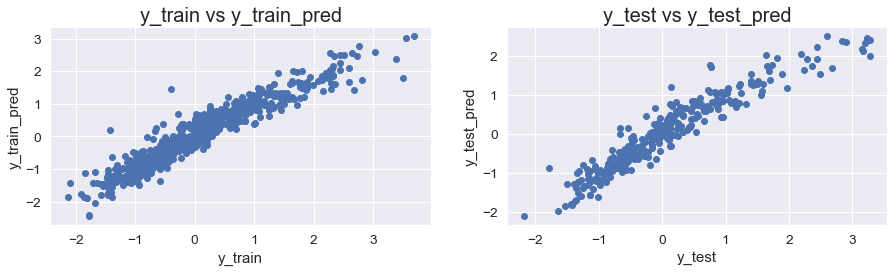

In [73]:
plt.figure(figsize=(15,8))
#sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = plt.scatter(y_train,y_train_pred)
plt.title('y_train vs y_train_pred',fontsize=20)
plt.xlabel('y_train',fontsize=15)
plt.ylabel('y_train_pred',fontsize=15)
# subplot 2
plt.subplot(2, 2, 2)
ax1 = plt.scatter(y_test,y_test_pred)
plt.title('y_test vs y_test_pred',fontsize=20)
plt.xlabel('y_test',fontsize=15)
plt.ylabel('y_test_pred',fontsize=15)
plt.show()

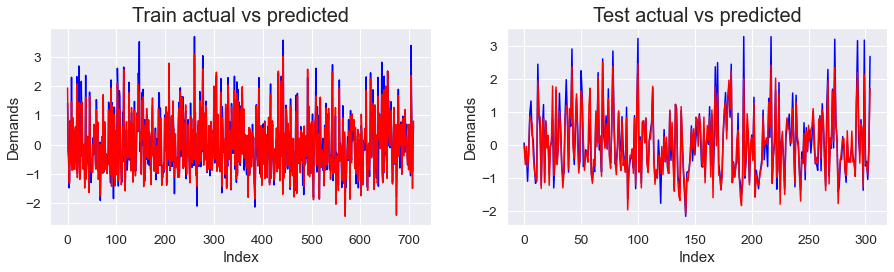

In [74]:
plt.figure(figsize=(15,8))
#sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.title('Train actual vs predicted',fontsize=20)
plt.xlabel('Index',fontsize=15)
plt.ylabel('Demands',fontsize=15)
# subplot 2
plt.subplot(2, 2, 2)
c = [i for i in range(0,len(X_test_new),1)]
plt.plot(c,y_test, color="blue")
plt.plot(c,y_test_pred, color="red")
plt.title('Test actual vs predicted',fontsize=20)
plt.xlabel('Index',fontsize=15)
plt.ylabel('Demands',fontsize=15)
plt.show()

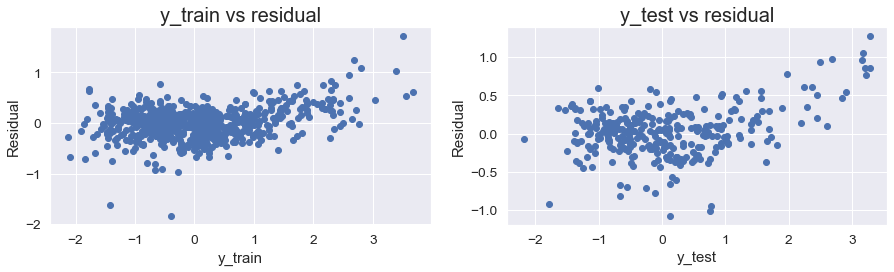

In [75]:
plt.figure(figsize=(15,8))
#sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
plt.scatter(y_train,y_train-y_train_pred)
plt.title('y_train vs residual',fontsize=20)
plt.xlabel('y_train',fontsize=15)
plt.ylabel('Residual',fontsize=15)
# subplot 2
plt.subplot(2, 2, 2)
plt.scatter(y_test,y_test-y_test_pred)
plt.title('y_test vs residual',fontsize=20)
plt.xlabel('y_test',fontsize=15)
plt.ylabel('Residual',fontsize=15)
plt.show()

In [76]:
print("Train Mean Square Error : " , mean_squared_error(y_true=y_train,y_pred=y_train_pred))
print("Test Mean Square Error  : " , mean_squared_error(y_true=y_test,y_pred=y_test_pred))
print("")
print("Train R2 Square : " , r2_score(y_true=y_train,y_pred=y_train_pred))
print("Test R2 Square  : " , r2_score(y_true=y_test,y_pred=y_test_pred))


Train Mean Square Error :  0.09323364809123184
Test Mean Square Error  :  0.10488377045962893

Train R2 Square :  0.9067663519087682
Test R2 Square  :  0.9025923265777276


In [77]:
# Let us store all the required metrics in a dictionary to be displayed at the end to compare the models
metricData = {'Metric' : ["R2 Square(Train)","R2 Square(Test)" , "MSE(Train)", "MSE(Test)"],
        'Linear Regression' :["", "", "", ""],
        'Ridge Regression' : ["", "", "", ""],
        'Lasso Regression' : ["", "", "", ""]
        }
metricData['Linear Regression']=[r2_score(y_true=y_train,y_pred=y_train_pred),
                                r2_score(y_true=y_test,y_pred=y_test_pred),
                                mean_squared_error(y_true=y_train,y_pred=y_train_pred),
                                mean_squared_error(y_true=y_test,y_pred=y_test_pred)]

### Regularization
    is a technique to avoid Overfittng and this can be achieved using 
    -  Lasso regression
    -  Ridge regression
### Let us first start with Ridge regression

In [78]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = KFold(n_splits=10,shuffle=True,random_state=100)
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train, y_train) 


Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [79]:
# Printing the best hyperparameter alpha
print(model_cv_ridge.best_params_)

{'alpha': 50}


In [80]:
cv_result_r = pd.DataFrame(model_cv_ridge.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003685,0.001228,0.001955,0.000265,0.0001,{'alpha': 0.0001},0.855388,0.882316,0.944841,0.877655,0.909715,0.940278,0.854457,0.863015,0.918658,0.828610,0.887493,0.037218,26,0.941272,0.938917,0.934063,0.939260,0.939072,0.935988,0.942601,0.940687,0.937400,0.944271,0.939353,0.002891
1,0.002977,0.000106,0.001754,0.000038,0.0010,{'alpha': 0.001},0.855389,0.882315,0.944842,0.877658,0.909717,0.940277,0.854459,0.863031,0.918662,0.828614,0.887496,0.037217,25,0.941272,0.938917,0.934063,0.939260,0.939072,0.935988,0.942601,0.940687,0.937400,0.944271,0.939353,0.002891
2,0.003394,0.000615,0.001997,0.000377,0.0100,{'alpha': 0.01},0.855404,0.882303,0.944857,0.877684,0.909732,0.940271,0.854478,0.863188,0.918695,0.828655,0.887527,0.037202,24,0.941271,0.938917,0.934063,0.939260,0.939072,0.935988,0.942601,0.940687,0.937400,0.944271,0.939353,0.002891
3,0.003016,0.000175,0.001836,0.000102,0.0500,{'alpha': 0.05},0.855469,0.882249,0.944901,0.877803,0.909794,0.940243,0.854561,0.863799,0.918828,0.828831,0.887648,0.037137,23,0.941269,0.938916,0.934062,0.939259,0.939069,0.935987,0.942600,0.940685,0.937397,0.944269,0.939351,0.002891
4,0.002989,0.000049,0.001758,0.000040,0.1000,{'alpha': 0.1},0.855552,0.882188,0.944920,0.877955,0.909861,0.940214,0.854662,0.864410,0.918962,0.829043,0.887777,0.037059,22,0.941264,0.938912,0.934058,0.939255,0.939064,0.935983,0.942600,0.940681,0.937391,0.944264,0.939347,0.002892


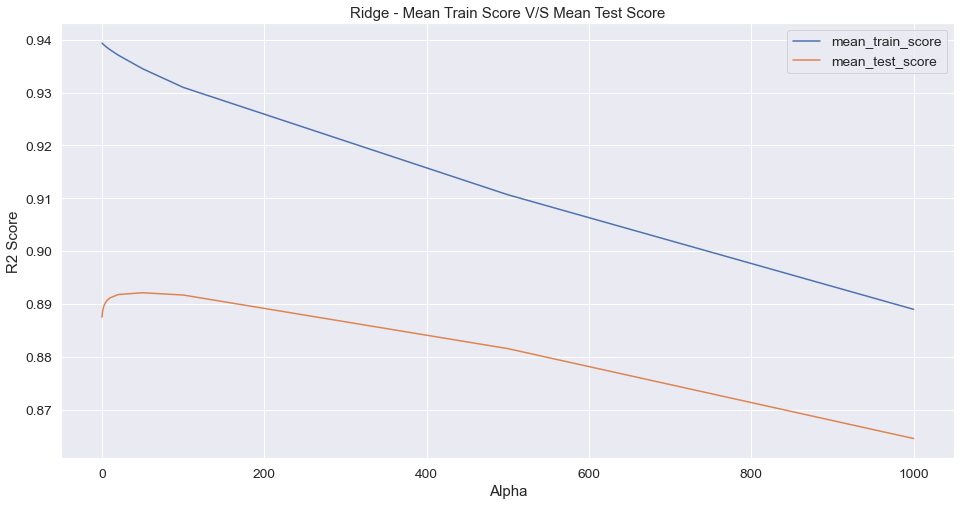

In [81]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.legend(['mean_train_score','mean_test_score'])
plt.title("Ridge - Mean Train Score V/S Mean Test Score")
plt.show()

In [82]:
#Fitting Ridge model for alpha = 50 and printing coefficients which have been penalised
alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=50)

In [83]:
ridge.coef_

array([-6.07118440e-02,  4.85568324e-03,  5.31418430e-02,  6.77972222e-03,
        2.30745302e-02,  1.45020502e-01,  7.60337330e-02,  3.09066464e-02,
        5.05665071e-02, -1.72874525e-02,  3.62906308e-02,  3.67751912e-02,
        3.96237879e-02,  7.22526906e-02,  7.57682732e-03,  1.97746914e-03,
        8.38911386e-02,  1.74358528e-02,  5.67858064e-02,  1.05155339e-01,
       -2.69560328e-03,  1.40532340e-01,  2.67947862e-02,  0.00000000e+00,
        3.95426914e-02,  1.16485897e-02, -1.37199113e-02,  0.00000000e+00,
        6.22388241e-02,  5.24959471e-02,  2.90375310e-02,  1.95850941e-02,
        4.64503781e-02,  4.10284820e-02,  4.19589003e-02,  2.95451602e-02,
        1.96640863e-03,  0.00000000e+00,  3.82315224e-02,  0.00000000e+00,
       -8.20686124e-03,  2.08465739e-02, -1.01850297e-01,  9.85069462e-03,
       -6.00147987e-03,  2.26130894e-03,  1.41527856e-02,  1.95888366e-03,
        2.52211364e-02,  1.14300889e-02,  2.54206513e-02, -9.07393002e-03,
       -8.65196705e-03,  

In [84]:
# ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = houseprice.drop(['SalePrice'], axis=1).columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -0.0),
 ('MSSubClass', -0.102),
 ('LotFrontage', -0.061),
 ('LotArea', -0.041),
 ('LotShape', -0.039),
 ('LandSlope', -0.039),
 ('OverallQual', -0.037),
 ('OverallCond', -0.035),
 ('MasVnrArea', -0.033),
 ('ExterQual', -0.031),
 ('ExterCond', -0.029),
 ('BsmtQual', -0.029),
 ('BsmtExposure', -0.028),
 ('BsmtFinType1', -0.028),
 ('BsmtFinSF1', -0.025),
 ('BsmtFinSF2', -0.025),
 ('BsmtUnfSF', -0.025),
 ('TotalBsmtSF', -0.024),
 ('HeatingQC', -0.024),
 ('1stFlrSF', -0.022),
 ('2ndFlrSF', -0.022),
 ('LowQualFinSF', -0.02),
 ('GrLivArea', -0.02),
 ('BsmtFullBath', -0.019),
 ('BsmtHalfBath', -0.018),
 ('FullBath', -0.017),
 ('HalfBath', -0.016),
 ('BedroomAbvGr', -0.014),
 ('KitchenAbvGr', -0.013),
 ('KitchenQual', -0.013),
 ('TotRmsAbvGrd', -0.012),
 ('Fireplaces', -0.012),
 ('GarageFinish', -0.012),
 ('GarageCars', -0.011),
 ('GarageArea', -0.01),
 ('WoodDeckSF', -0.009),
 ('OpenPorchSF', -0.009),
 ('EnclosedPorch', -0.009),
 ('3SsnPorch', -0.009),
 ('ScreenPorch', -0.008),
 

In [85]:
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print("Train Mean Square Error : " , mean_squared_error(y_true=y_train,y_pred=y_train_pred))
print("Test Mean Square Error  : " , mean_squared_error(y_true=y_test,y_pred=y_test_pred))
print("")
print("Train R2 Square : " , r2_score(y_true=y_train,y_pred=y_train_pred))
print("Test R2 Square  : " , r2_score(y_true=y_test,y_pred=y_test_pred))

metricData['Ridge Regression']=[r2_score(y_true=y_train,y_pred=y_train_pred),
                                r2_score(y_true=y_test,y_pred=y_test_pred),
                                mean_squared_error(y_true=y_train,y_pred=y_train_pred),
                                mean_squared_error(y_true=y_test,y_pred=y_test_pred)]


Train Mean Square Error :  0.06659519772598296
Test Mean Square Error  :  0.09913632303836117

Train R2 Square :  0.933404802274017
Test R2 Square  :  0.9079300969398069


### Let us try Lasso regression

In [86]:
#params = {'alpha': [0.00006,0.0006, 0.0008, 0.001, 0.002, 0.004, 0.006, 0.008 ]}
lasso = Lasso()

# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [87]:
# Printing the best hyperparameter alpha
print(model_cv_lasso.best_params_)

{'alpha': 0.01}


In [88]:
cv_results = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.043739,0.001860,0.002119,0.000240,0.0001,{'alpha': 0.0001},0.855847,0.882457,0.943706,0.880210,0.909936,0.940138,0.855500,0.867216,0.919905,0.830085,0.888500,0.036450,3,0.941179,0.938841,0.933975,0.939187,0.938994,0.935918,0.942567,0.940606,0.937285,0.944193,0.939274,0.002898
1,0.017271,0.001065,0.002141,0.000193,0.001,{'alpha': 0.001},0.861613,0.882726,0.937858,0.897453,0.910888,0.941680,0.859825,0.869181,0.919384,0.837086,0.891769,0.033597,2,0.939674,0.937578,0.932850,0.937463,0.937516,0.934446,0.940999,0.939073,0.935806,0.942737,0.937814,0.002823
2,0.005931,0.000909,0.001982,0.000258,0.01,{'alpha': 0.01},0.871295,0.896111,0.928900,0.923887,0.909403,0.939097,0.849013,0.873015,0.920490,0.848938,0.896015,0.031715,1,0.927606,0.926128,0.922377,0.924578,0.925228,0.922131,0.929421,0.928363,0.923473,0.931052,0.926036,0.002872
3,0.004494,0.000719,0.001899,0.000194,0.05,{'alpha': 0.05},0.859721,0.870904,0.892293,0.912589,0.895947,0.904708,0.797687,0.843963,0.872714,0.851397,0.870192,0.032489,4,0.885978,0.885617,0.880372,0.882946,0.882928,0.880450,0.892408,0.888235,0.880529,0.887595,0.884706,0.003784
4,0.004585,0.000657,0.002087,0.000213,0.1,{'alpha': 0.1},0.826001,0.851507,0.859101,0.889480,0.870575,0.865578,0.767264,0.819315,0.820958,0.828295,0.839808,0.033088,5,0.849749,0.853389,0.845982,0.849821,0.846113,0.846284,0.858414,0.855155,0.846484,0.854489,0.850588,0.004279


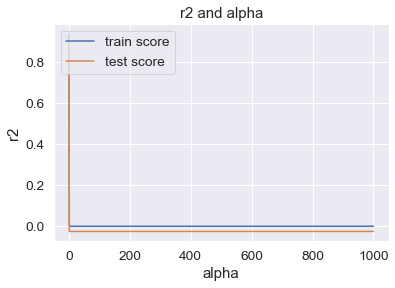

In [89]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting mean train and test score for various alpha
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')

plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [90]:
#optimum alpha

alpha =0.01
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.01)

In [91]:
lasso.coef_

array([-0.08005059,  0.        ,  0.05264993, -0.        ,  0.00833491,
        0.18675576,  0.06418328,  0.01390866,  0.05893885, -0.00440845,
        0.01089564,  0.03073976,  0.0254682 ,  0.07938505,  0.        ,
       -0.        ,  0.05972959,  0.00629804,  0.        ,  0.        ,
       -0.        ,  0.32757704,  0.02303137,  0.        ,  0.00333535,
        0.        , -0.        ,  0.        ,  0.06083376,  0.02064902,
        0.02269042,  0.00613344,  0.0328123 ,  0.03925195,  0.03106787,
        0.02248558,  0.        ,  0.        ,  0.02721757,  0.        ,
       -0.00087815,  0.0067555 , -0.16187389, -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.02564137, -0.        , -0.        ,  0.00276561, -0.00506667,
       -0.        , -0.        ,  0.        ,  0.        ,  0.0219073 ,
       -0.        ,  0.        ,  0.07661405, -0.        , -0.00311153,
       -0.        , -0.        , -0.00102219, -0.        ,  0.  

In [92]:
lasso.score(X_train,y_train)

0.9247471116222837

In [93]:
lasso.score(X_test,y_test)

0.9146122806738151

In [94]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Train Mean Square Error : " , mean_squared_error(y_true=y_train,y_pred=y_train_pred))
print("Test Mean Square Error  : " , mean_squared_error(y_true=y_test,y_pred=y_test_pred))
print("")
print("Train R2 Square : " , r2_score(y_true=y_train,y_pred=y_train_pred))
print("Test R2 Square  : " , r2_score(y_true=y_test,y_pred=y_test_pred))

metricData['Lasso Regression']=[r2_score(y_true=y_train,y_pred=y_train_pred),
                                r2_score(y_true=y_test,y_pred=y_test_pred),
                                mean_squared_error(y_true=y_train,y_pred=y_train_pred),
                                mean_squared_error(y_true=y_test,y_pred=y_test_pred)]


Train Mean Square Error :  0.07525288837771628
Test Mean Square Error  :  0.09194127771694681

Train R2 Square :  0.9247471116222837
Test R2 Square  :  0.9146122806738151


In [95]:
## Let us compare the co-efficients post regularization
modelcomparisonData = pd.DataFrame(index=X_train.columns)
modelcomparisonData.rows = X_train.columns
modelcomparisonData['Linear'] = lr_model.params
modelcomparisonData['Linear'] = modelcomparisonData['Linear'].fillna(0)
modelcomparisonData['Ridge'] = ridge.coef_
modelcomparisonData['Lasso'] = lasso.coef_

In [96]:
#Top 5 features for Linear
modelcomparisonData['Linear'].sort_values(ascending=False).head(5)

GrLivArea               0.410456
OverallQual             0.186179
BsmtFinSF1              0.126323
Neighborhood_NridgHt    0.103259
Neighborhood_Crawfor    0.096915
Name: Linear, dtype: float64

In [97]:
#Top 5 features for Ridge
modelcomparisonData['Ridge'].sort_values(ascending=False).head(5)

OverallQual             0.145021
GrLivArea               0.140532
2ndFlrSF                0.105155
Neighborhood_NridgHt    0.090654
TotalBsmtSF             0.083891
Name: Ridge, dtype: float64

In [98]:
#Top 5 features for Lasso
modelcomparisonData['Lasso'].sort_values(ascending=False).head(5)

GrLivArea               0.327577
OverallQual             0.186756
Neighborhood_NridgHt    0.095961
BsmtFinSF1              0.079385
Neighborhood_Crawfor    0.076614
Name: Lasso, dtype: float64

### Display the final metrics comparing Linear, Ridge and Lasso regression

In [99]:
#Display R2 square and Mean square error metric data for 
# Linear,Ridge and Lasso regression models
combinedMetricData = pd.DataFrame(metricData)
display(combinedMetricData)
print("Optimal value of alpha for Ridge",model_cv_ridge.best_params_)
print("Optimal value of alpha for Lasso",model_cv_lasso.best_params_)


,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Square(Train),0.906766,0.933405,0.924747
1,R2 Square(Test),0.902592,0.907930,0.914612
2,MSE(Train),0.093234,0.066595,0.075253
3,MSE(Test),0.104884,0.099136,0.091941


Optimal value of alpha for Ridge {'alpha': 50}
Optimal value of alpha for Lasso {'alpha': 0.01}


<font color='black'><b>-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></font>

## Summary

- Based on the final metrics displayed above for this data set,
 <font color='Blue'><u>Lasso Regression</u></font> performs better than Ridge and Linear regression models<br>
 Also most of co-efficients are zero with Lasso model, hence it will be good where the model is<br> 
 neither too simple nor too complex. Hence will address the issue of underfitting and overfitting.<br>
- <font color='Green'><b><u>We will finalize Lasso regression as our preferred choice</b></u></font>
- Optimal alpha value for Lasso is 0.01<br>
- Top 5 features selected by Lasso are <br>
    - GrLivArea               0.327577
    - OverallQual             0.186756
    - Neighborhood_NridgHt    0.095961
    - BsmtFinSF1              0.079385
    - Neighborhood_Crawfor    0.076614

<font color='black'><b>-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></font>


<font color='black'><b>----------------------------------------------------------------End of Assignment Part I--------------------------------------------------------------------------------</b></font>


### Assignment - Part II 

#### Question1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [100]:
# Lasso regression 
alpha = 0.02 # Optimal value for lasso - 0.01, so double of that will be 0.02 
lasso_double = Lasso(alpha=alpha)
lasso_double.fit(X_train, y_train) 
y_train_pred_newalpha = lasso_double.predict(X_train)
y_test_pred_newaplha = lasso_double.predict(X_test)
modelcomparisonData_1 = pd.DataFrame(index=X_train.columns)
modelcomparisonData_1.rows = X_train.columns
modelcomparisonData_1['Lasso'] = lasso_double.coef_
print("Lasso - Train score - ",lasso_double.score(X_train,y_train))
print("Lasso - Test score - ",lasso_double.score(X_test,y_test))
print("Lasso - Train R2 Square : " , r2_score(y_true=y_train,y_pred=y_train_pred_newalpha))
print("Lasso - Test R2 Square  : " , r2_score(y_true=y_test,y_pred=y_test_pred_newaplha))
print("Lasso - Top 5 important variables after the change -:")
modelcomparisonData_1['Lasso'].sort_values(ascending=False).head(5)

Lasso - Train score -  0.9136221958739661
Lasso - Test score -  0.9089349543673818
Lasso - Train R2 Square :  0.9136221958739661
Lasso - Test R2 Square  :  0.9089349543673818
Lasso - Top 5 important variables after the change -:


GrLivArea               0.337137
OverallQual             0.199561
BsmtFinSF1              0.085703
Neighborhood_NridgHt    0.078600
TotalBsmtSF             0.078486
Name: Lasso, dtype: float64

In [101]:
# Ridge regression 
alpha = 100 # Optimal value for ridge - 50, so double of that will be 100
ridge_double = Ridge(alpha=alpha)
ridge_double.fit(X_train, y_train) 
y_train_pred_newalpha = ridge_double.predict(X_train)
y_test_pred_newaplha = ridge_double.predict(X_test)
modelcomparisonData_2 = pd.DataFrame(index=X_train.columns)
modelcomparisonData_2.rows = X_train.columns
modelcomparisonData_2['Ridge'] = ridge_double.coef_
print("Ridge - Train score - ",ridge_double.score(X_train,y_train))
print("Ridge - Test score - ",ridge_double.score(X_test,y_test))
print("Ridge - Train R2 Square : " , r2_score(y_true=y_train,y_pred=y_train_pred_newalpha))
print("Ridge - Test R2 Square  : " , r2_score(y_true=y_test,y_pred=y_test_pred_newaplha))
print("Ridge - Top 5 important variables after the change -:")
modelcomparisonData_2['Ridge'].sort_values(ascending=False).head(5)

Ridge - Train score -  0.9301854096723661
Ridge - Test score -  0.9094589803584031
Ridge - Train R2 Square :  0.9301854096723661
Ridge - Test R2 Square  :  0.9094589803584031
Ridge - Top 5 important variables after the change -:


OverallQual             0.132774
GrLivArea               0.123681
Neighborhood_NridgHt    0.083271
2ndFlrSF                0.082002
TotalBsmtSF             0.078835
Name: Ridge, dtype: float64

#### Question3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [102]:
Top5_Columns_Lasso = ['GrLivArea','OverallQual','Neighborhood_NridgHt','BsmtFinSF1','Neighborhood_Crawfor']
# Drop the top 5 columns identified by Lasso
X_train_new = X_train.drop(Top5_Columns_Lasso,axis=1)
X_test_new = X_test.drop(Top5_Columns_Lasso,axis=1)
lasso.fit(X_train_new, y_train)

Lasso(alpha=0.01)

In [103]:
lasso.predict(X_test_new)
modelcomparisonData_3 = pd.DataFrame(index=X_train_new.columns)
modelcomparisonData_3.rows = X_train_new.columns
modelcomparisonData_3['Lasso'] = lasso.coef_
print("The top five most important predictor variables after the change:")
modelcomparisonData_3['Lasso'].sort_values(ascending=False).head(5)

The top five most important predictor variables after the change:


2ndFlrSF       0.300650
1stFlrSF       0.200534
TotalBsmtSF    0.176360
ExterQual      0.105744
OverallCond    0.086057
Name: Lasso, dtype: float64

<font color='black'><b>----------------------------------------------------------------End of Assignment Part II--------------------------------------------------------------------------------</b></font>